In [1]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


# OncoKB driver annotations study

Created: **23/07/18**  
Last modified: **06/08/18**

**Goal:** This notebook studies the OncoKB annotations added with oncokb-annotator and via the `annotate_cleaned_dataset.ipynb` notebook.  
This notebook is divided in 7 parts:
* **1. Study of the `oncogenic` feature**
* **2. Create and study the `label` feature** separate non-somatic, somatic_driver and somatic_passenger
* **3. Study of `cosmic_count` for driver vs passenger mutations**
* **4. Study of reccurence among driver mutations**
* **5. Study of `is_a_hostpost`, `is_a_3d_hostpot`**
* **6.  Study of `gene_type`**
* **7.  Annotate without oncokb-annotator**: try to annotate our dataset without using oncokb-annotator but using the raw OncoKB dataset instead, and then compare with the oncokb-annotator annotations
* **8.  Study of the alternative amino-acid**: study if the alternative amino-acid changes are also considered by oncokb-annotator

***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Study-of-the-oncogenic-feature" data-toc-modified-id="Study-of-the-oncogenic-feature-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Study of the <code>oncogenic</code> feature</a></span><ul class="toc-item"><li><span><a href="#oncogenic-vs-Consequence" data-toc-modified-id="oncogenic-vs-Consequence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>oncogenic</code> vs <code>Consequence</code></a></span></li><li><span><a href="#oncogenic-vs-class" data-toc-modified-id="oncogenic-vs-class-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>oncogenic</code> vs <code>class</code></a></span></li><li><span><a href="#Create-the-driver-feature" data-toc-modified-id="Create-the-driver-feature-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Create the <code>driver</code> feature</a></span></li></ul></li><li><span><a href="#Create-and-study-the-label-feature" data-toc-modified-id="Create-and-study-the-label-feature-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create and study the <code>label</code> feature</a></span><ul class="toc-item"><li><span><a href="#Create-the-feature" data-toc-modified-id="Create-the-feature-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create the feature</a></span></li><li><span><a href="#label-vs-Consequence" data-toc-modified-id="label-vs-Consequence-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>label</code> vs <code>Consequence</code></a></span></li><li><span><a href="#Comparison-of-the-t_vaf,-Kaviar_AF-and-cosmic_count" data-toc-modified-id="Comparison-of-the-t_vaf,-Kaviar_AF-and-cosmic_count-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comparison of the <code>t_vaf</code>, <code>Kaviar_AF</code> and <code>cosmic_count</code></a></span></li></ul></li><li><span><a href="#Study-of-cosmic_count-for-driver-vs-non-driver-mutations" data-toc-modified-id="Study-of-cosmic_count-for-driver-vs-non-driver-mutations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Study of <code>cosmic_count</code> for driver vs non-driver mutations</a></span></li><li><span><a href="#Study-of-reccurence-among-driver-mutations" data-toc-modified-id="Study-of-reccurence-among-driver-mutations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Study of reccurence among driver mutations</a></span><ul class="toc-item"><li><span><a href="#Identify-the-reccurent-mutations" data-toc-modified-id="Identify-the-reccurent-mutations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Identify the reccurent mutations</a></span></li><li><span><a href="#Sudy-the-reccurent-mutations-genes" data-toc-modified-id="Sudy-the-reccurent-mutations-genes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Sudy the reccurent mutations genes</a></span></li></ul></li><li><span><a href="#Study-of-is_a_hostpost,-is_a_3d_hostpot" data-toc-modified-id="Study-of-is_a_hostpost,-is_a_3d_hostpot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Study of <code>is_a_hostpost</code>, <code>is_a_3d_hostpot</code></a></span></li><li><span><a href="#Study-of-gene_type" data-toc-modified-id="Study-of-gene_type-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Study of <code>gene_type</code></a></span></li><li><span><a href="#Annotate-without-oncokb-annotator" data-toc-modified-id="Annotate-without-oncokb-annotator-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Annotate without oncokb-annotator</a></span><ul class="toc-item"><li><span><a href="#Get-the-raw-data" data-toc-modified-id="Get-the-raw-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Get the raw data</a></span></li><li><span><a href="#Create-keys-to-join-the-two-dataframes-and-extract-the-features" data-toc-modified-id="Create-keys-to-join-the-two-dataframes-and-extract-the-features-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create keys to join the two dataframes and extract the features</a></span></li><li><span><a href="#Compare-oncogenicity-with-oncogenic" data-toc-modified-id="Compare-oncogenicity-with-oncogenic-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Compare <code>oncogenicity</code> with <code>oncogenic</code></a></span></li></ul></li><li><span><a href="#Study-of-the-alternative-amino-acid" data-toc-modified-id="Study-of-the-alternative-amino-acid-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Study of the alternative amino-acid</a></span></li></ul></div>

In [4]:
source("../../../src/utils/custom_tools.R")
setup_environment("../../../src/utils")

In [5]:
impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
impact <- add_features("../../../data/", impact, annotations = TRUE, oncokb = TRUE, gene_type = TRUE)

## Study of the `oncogenic` feature

Most of our mutations are `Unknown`:

In [6]:
get_table(impact$oncogenic)

values,count,freq
Unknown,180991,72.9%
Likely Oncogenic,47127,19%
Oncogenic,16367,6.6%
Predicted Oncogenic,2900,1.2%
Inconclusive,523,0.2%
Likely Neutral,385,0.2%
-- total --,248293,100%



            Unknown    Likely Oncogenic           Oncogenic Predicted Oncogenic 
             180991               47127               16367                2900 
       Inconclusive      Likely Neutral 
                523                 385 


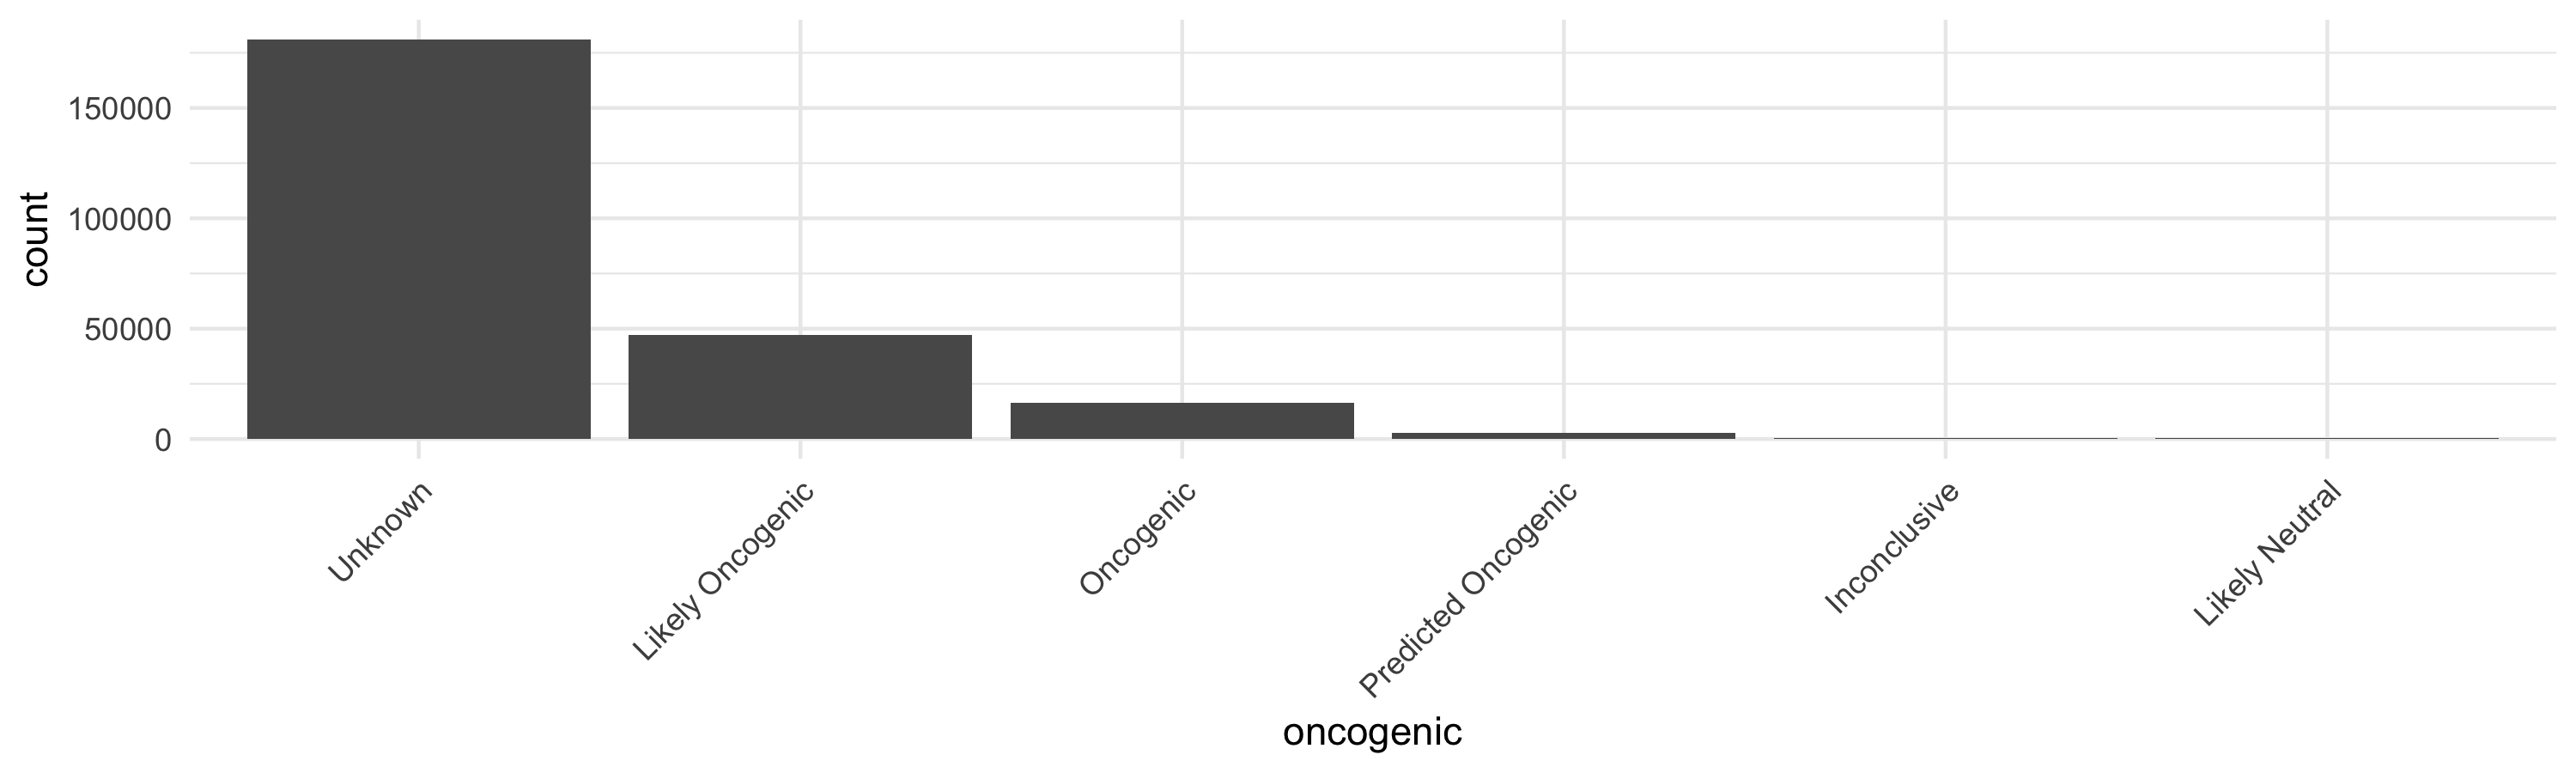

In [8]:
plot_histogram(impact, "oncogenic", print_table = TRUE) + tilt_x_label_45()

### `oncogenic` vs `Consequence`

Non of the synonymous mutations are in OncoKB. Among the truncating mutations a lot are predicted as `Likely Oncogenic` while most of the `nonsynonymous_SNV` and nonframeshift insertion/deletion are `Unknown`:

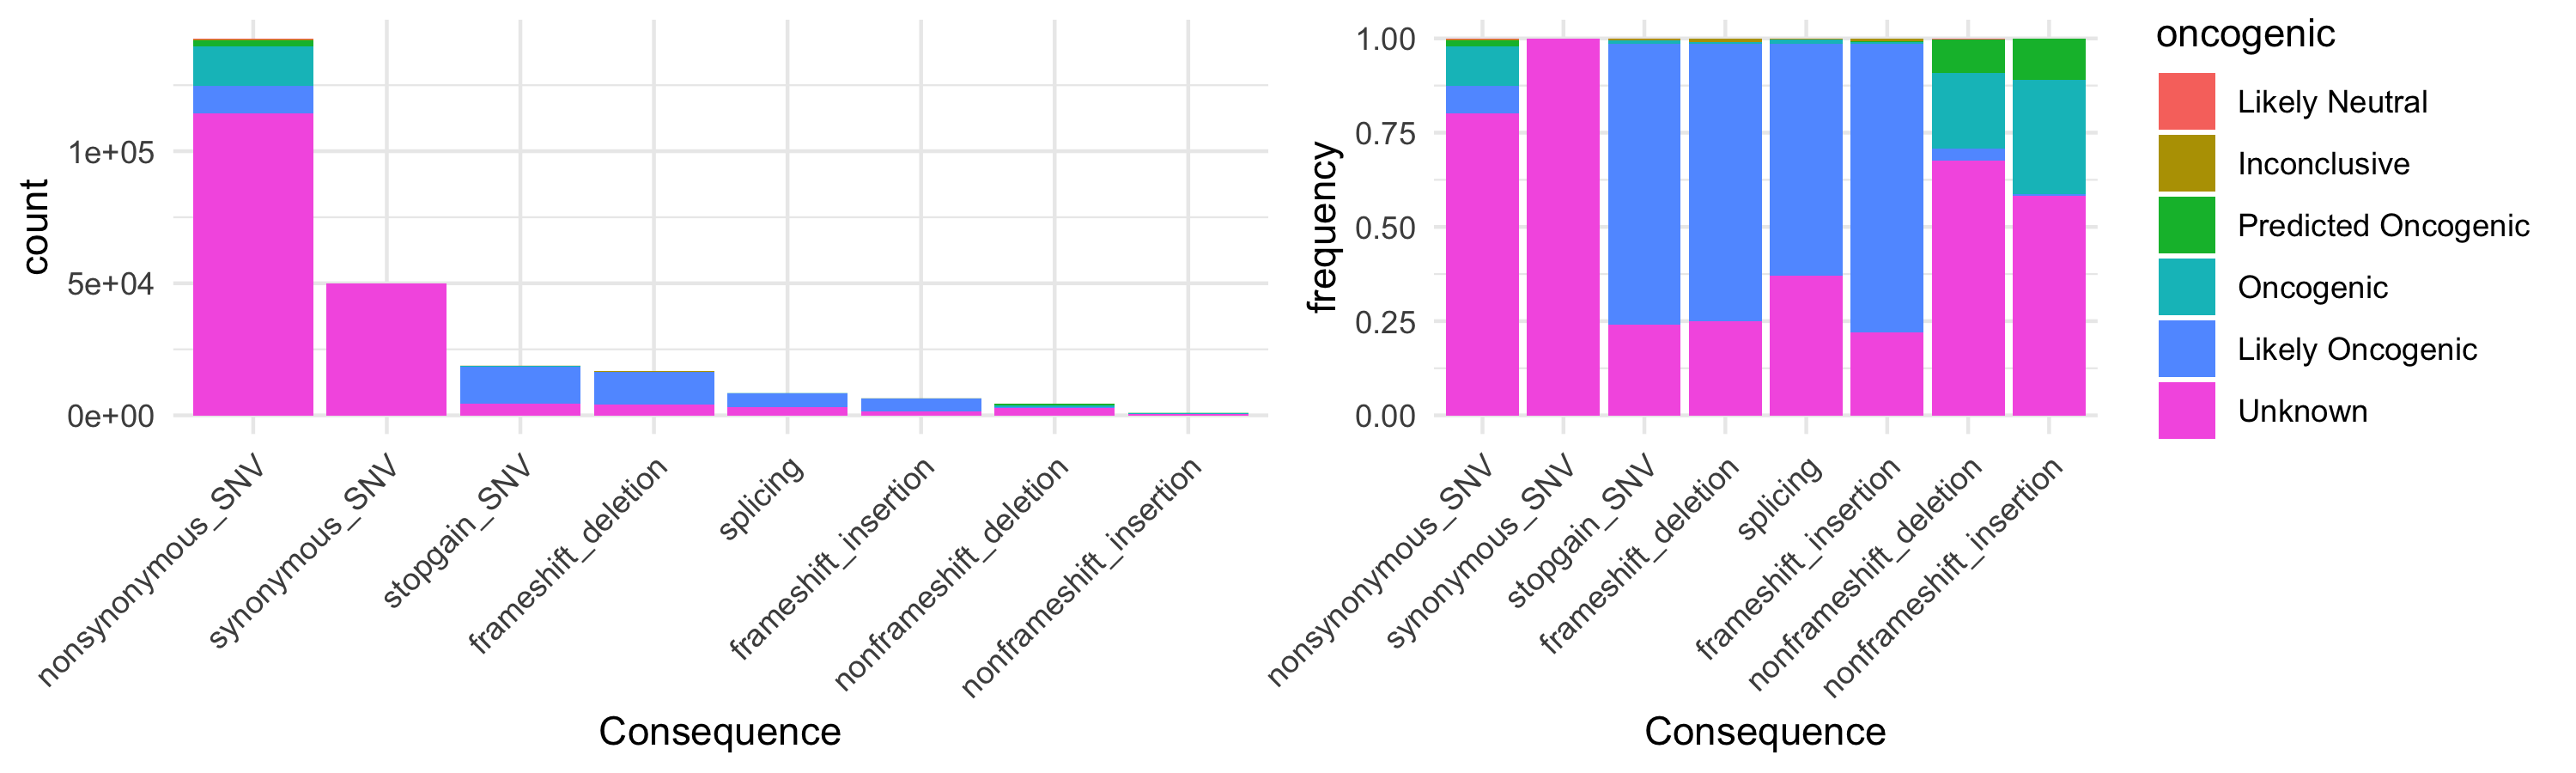

In [9]:
plot_contingency_table_as_histograms(impact, "Consequence", "oncogenic")

### `oncogenic` vs `class`

In [10]:
# create the class feature
impact$class <- "unknown"
impact$class[impact$confidence_class == "OK_NOT_SO" | impact$confidence_class == "UNLIKELY" ] <- "non-somatic"
impact$class[impact$confidence_class == "AUTO_OK"   | impact$confidence_class == "MANUAL_OK"] <- "somatic"
get_table(impact$class)

values,count,freq
somatic,187068,75.3%
unknown,50034,20.2%
non-somatic,11191,4.5%
-- total --,248293,100%


Some somatic mutations are in OncoKB:   
<font color = 'red'> Elsa? </font>

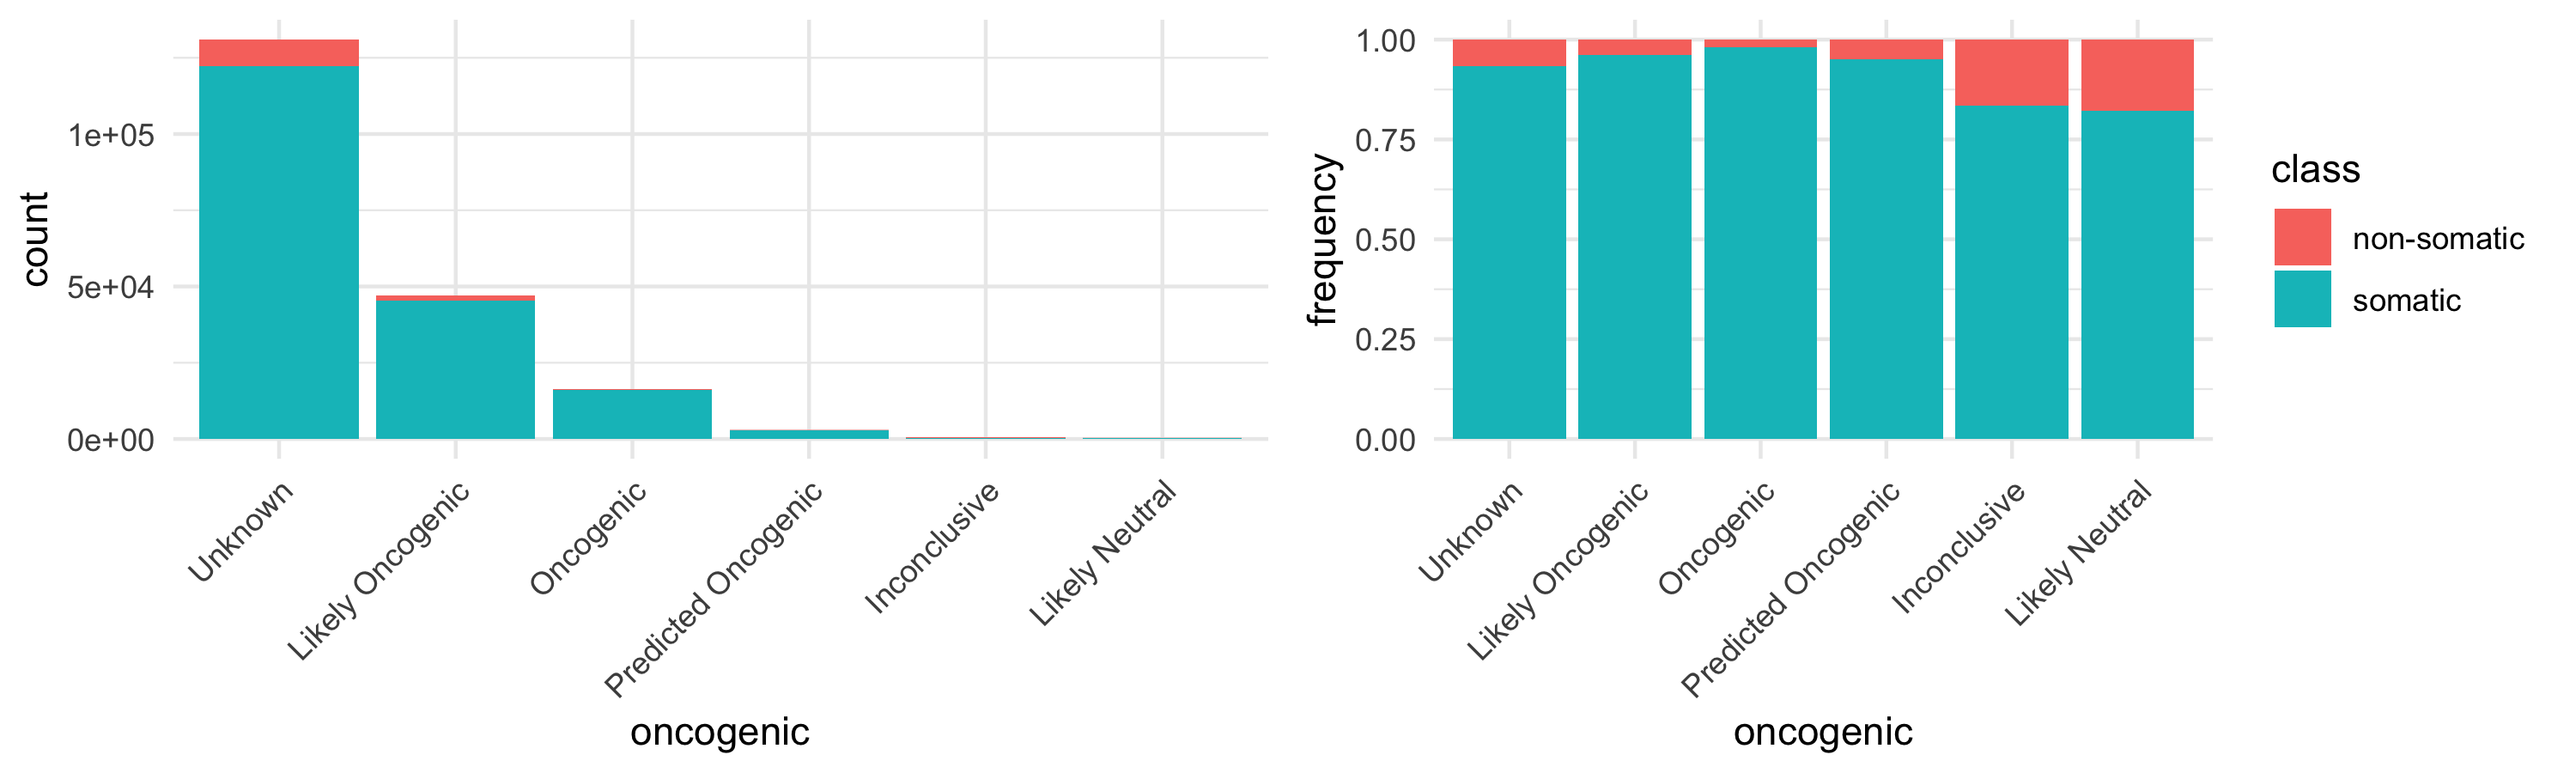

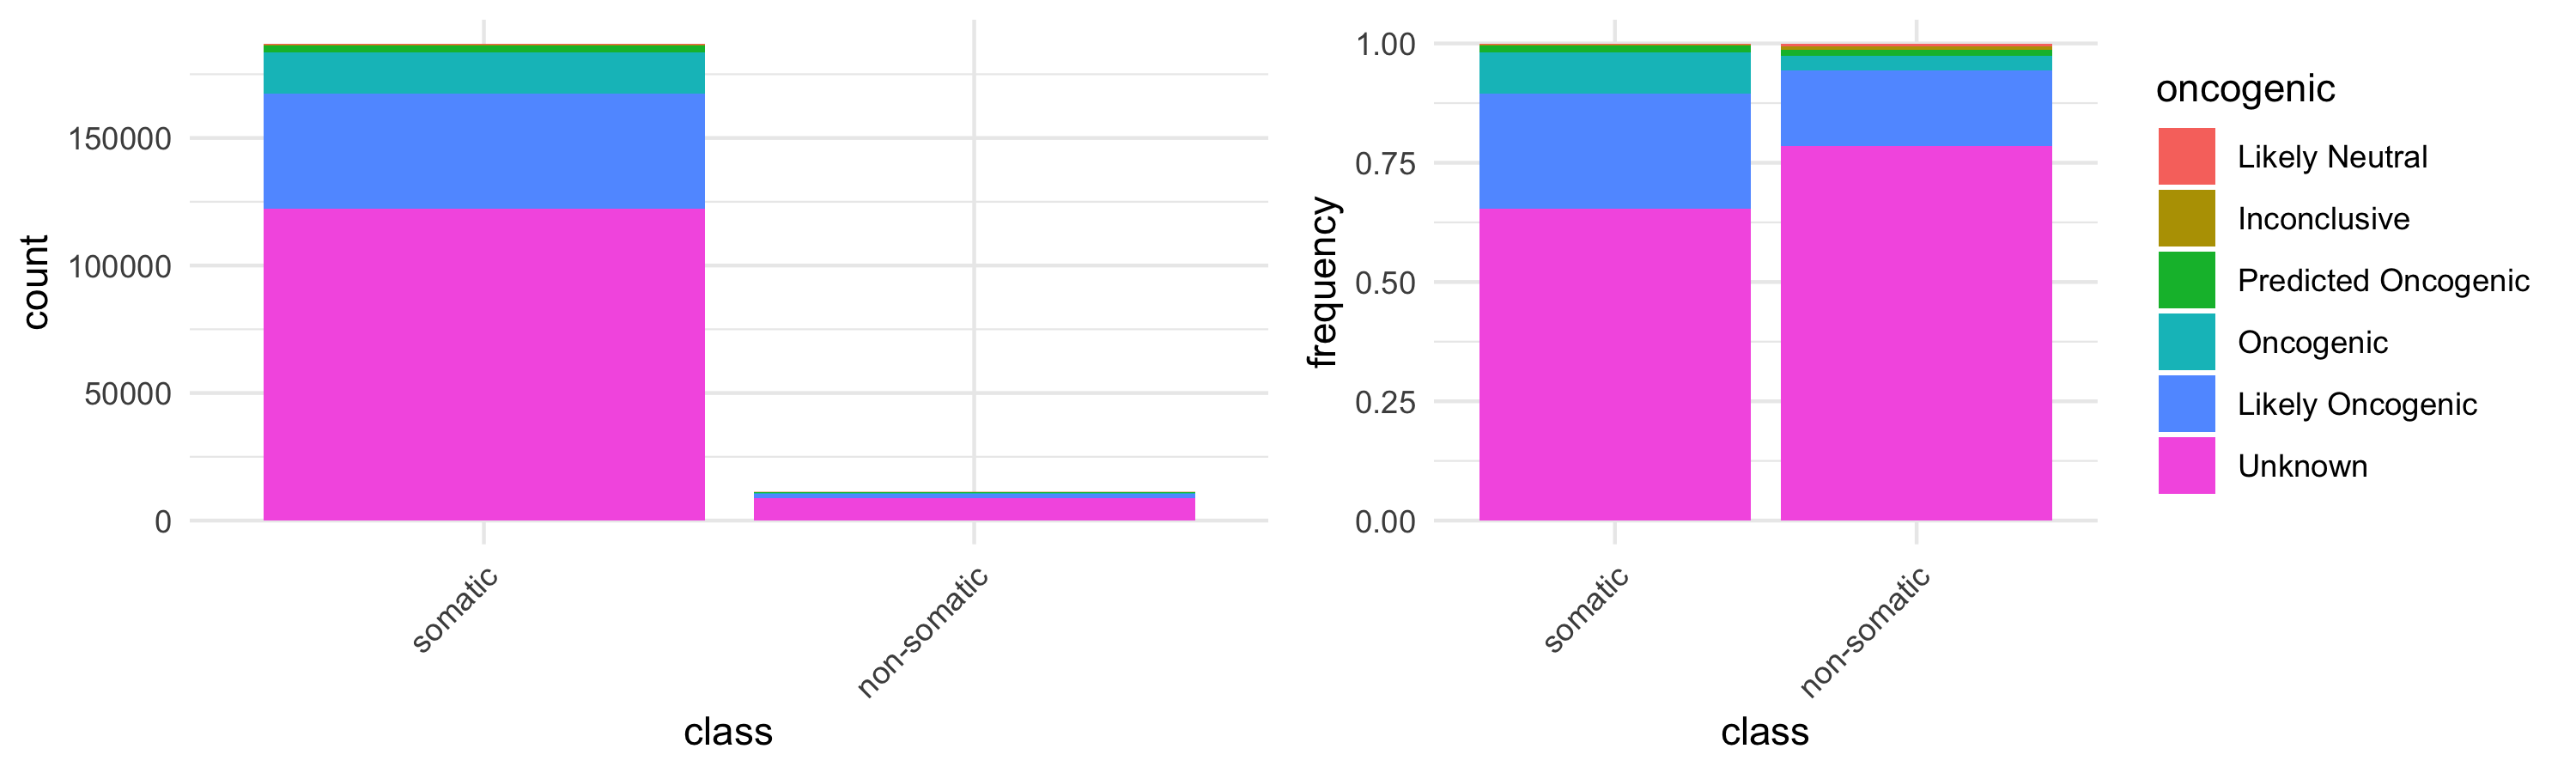

In [11]:
plot_contingency_table_as_histograms(impact[impact$class != "unknown",], "oncogenic", "class")
plot_contingency_table_as_histograms(impact[impact$class != "unknown",], "class", "oncogenic")

[1] "2252 over 248293 (0.91%)"

[1] "Number of different genes:  183"


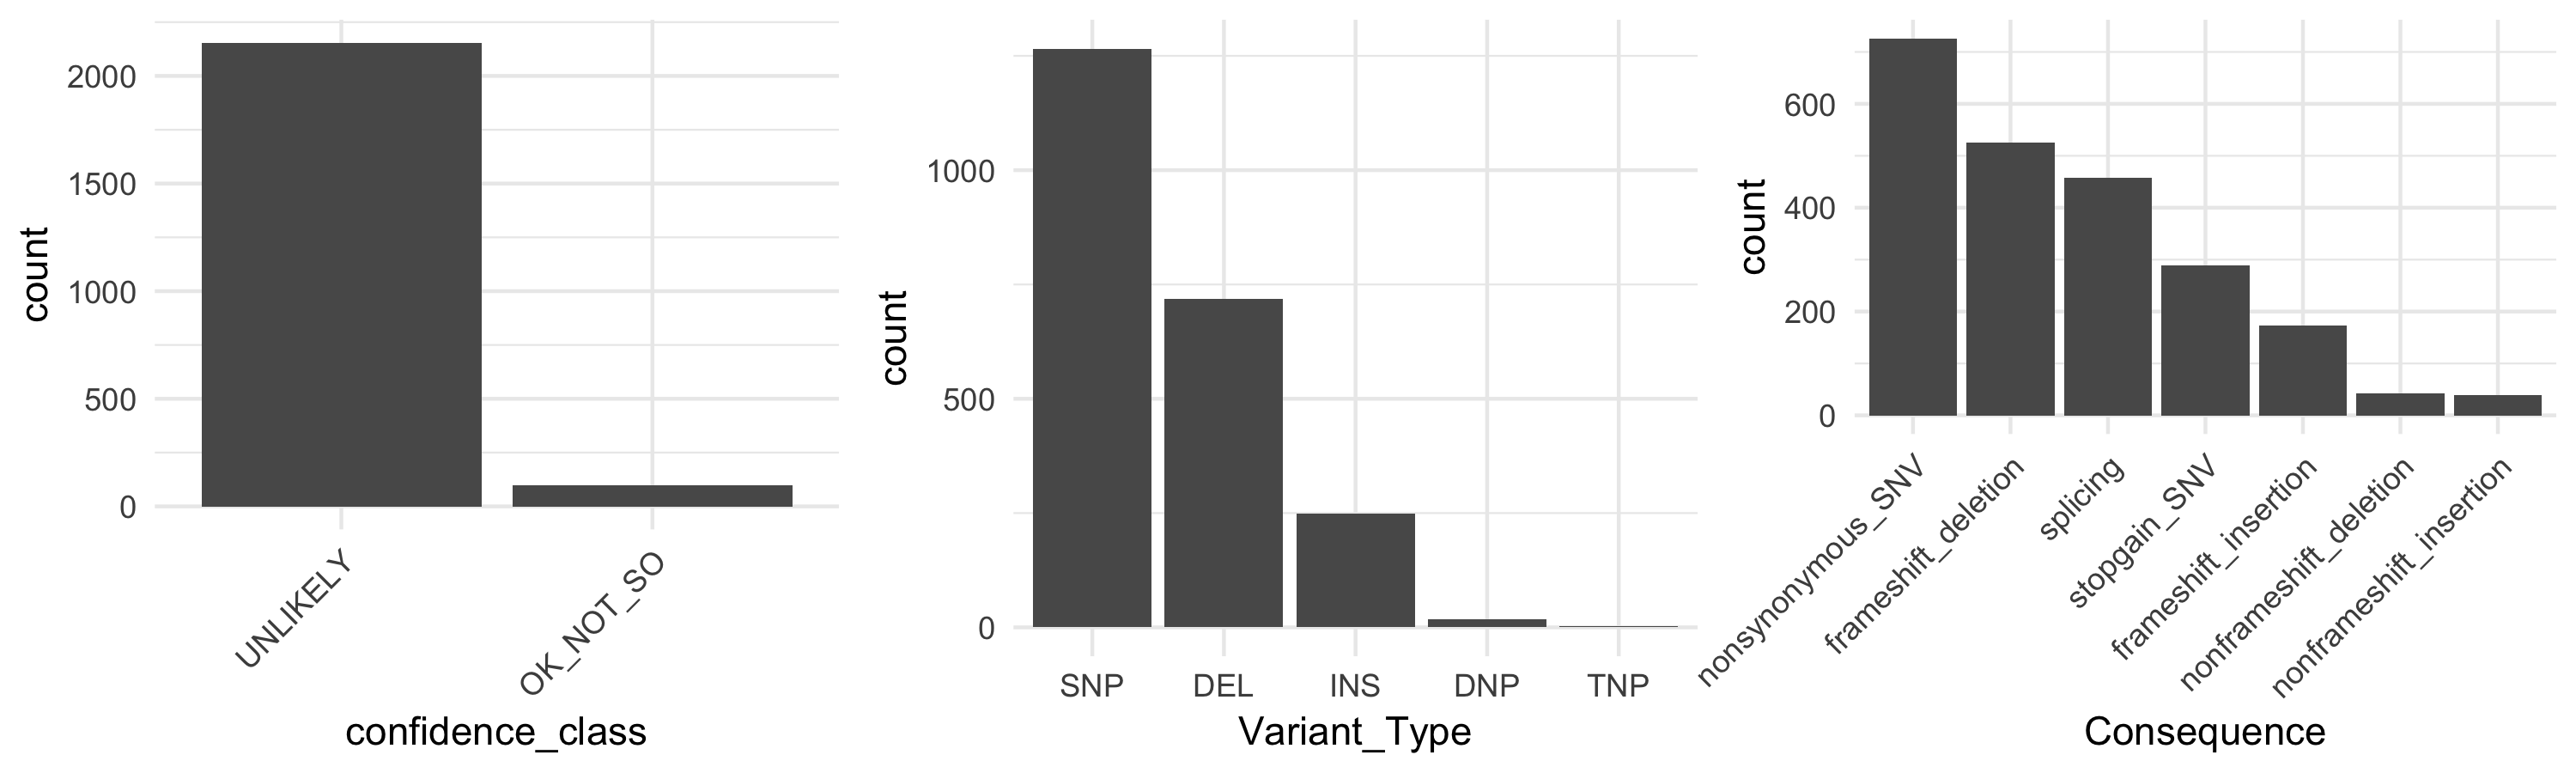

In [12]:
non_somatic_and_driver <- impact[impact$class == "non-somatic" & impact$oncogenic 
        %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic"),]

print_count_and_proportion(non_somatic_and_driver, impact)
get_possible_correlations(non_somatic_and_driver)

In [20]:
summary(non_somatic_and_driver$cosmic_count)
quantile(non_somatic_and_driver$cosmic_count, c(0.5, 0.7, 0.8))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   385.9     3.0 33328.0 

50% 70% 80% 
  0   2   7

In [21]:
length(unique(non_somatic_and_driver$mut_key))
length(unique(impact$mut_key))

[1] 1562

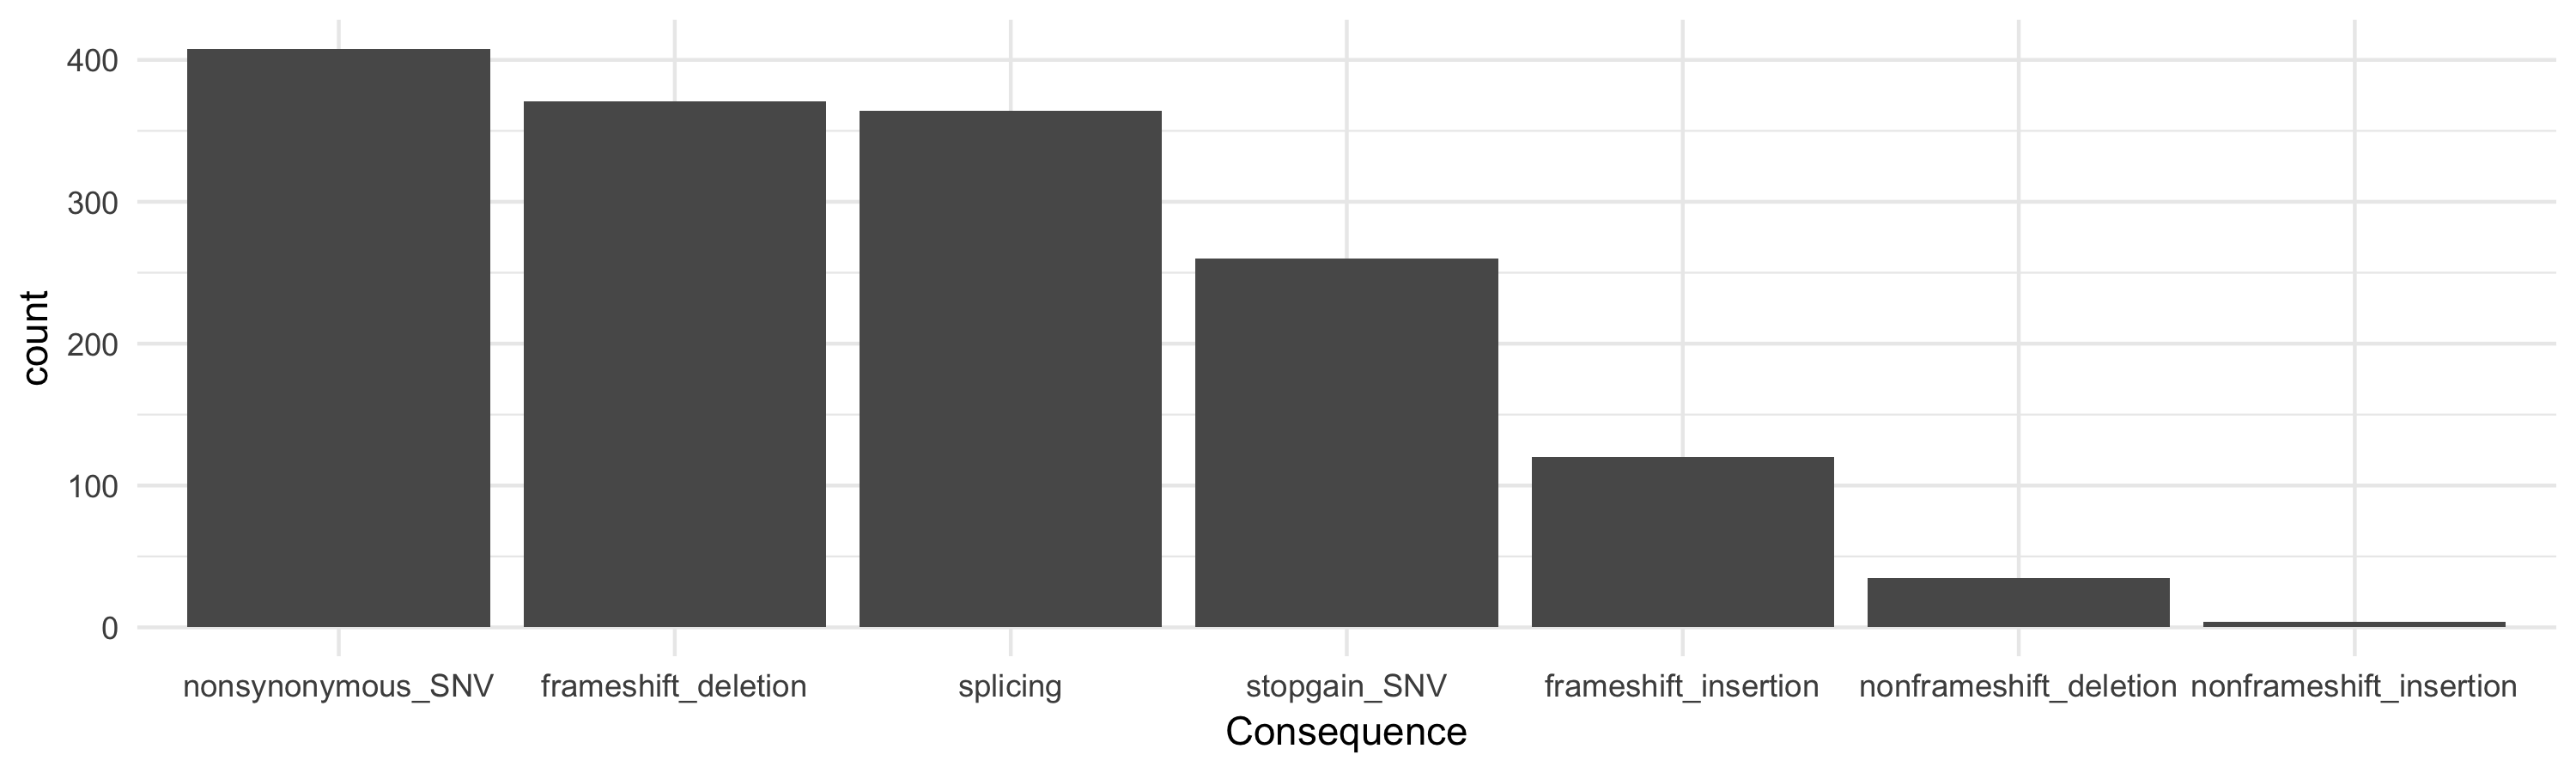

In [24]:
dd <- as.data.frame(non_somatic_and_driver %>% group_by(mut_key) %>% summarise(Consequence = unique(Consequence)))
plot_histogram(dd, "Consequence")

Remove inconsistent label

### Create the `driver` feature

We create the `driver` feature that indicates if a mutation has been classified as `Oncogenic`, `Likely Oncogenic` or `Predicted Oncogenic` by OncoKB. More than 25% of our mutations are known drivers in OncoKB:

In [25]:
impact$driver <- "no"
impact$driver[impact$oncogenic %in% c("Oncogenic", "Likely Oncogenic", "Predicted Oncogenic")] <- "yes"

print_count_and_proportion(impact[impact$driver == "yes",], impact)

[1] "66394 over 248293 (26.74%)"

Warning: driver mutations include some non-somatic mutations.

## Create and study the `label` feature

### Create the feature

We create the `label` feature that indicates if a mutation is non-somatic, passenger or driver:

In [26]:
impact$label[impact$class == "non-somatic"] <- "non-somatic"
impact$label[impact$class != "non-somatic" & impact$driver == "no" ] <- "somatic_passenger"
impact$label[impact$class != "non-somatic" & impact$driver == "yes"] <- "somatic_driver"

values,count,freq
somatic_passenger,172960,69.7%
somatic_driver,64142,25.8%
non-somatic,11191,4.5%
-- total --,248293,100%


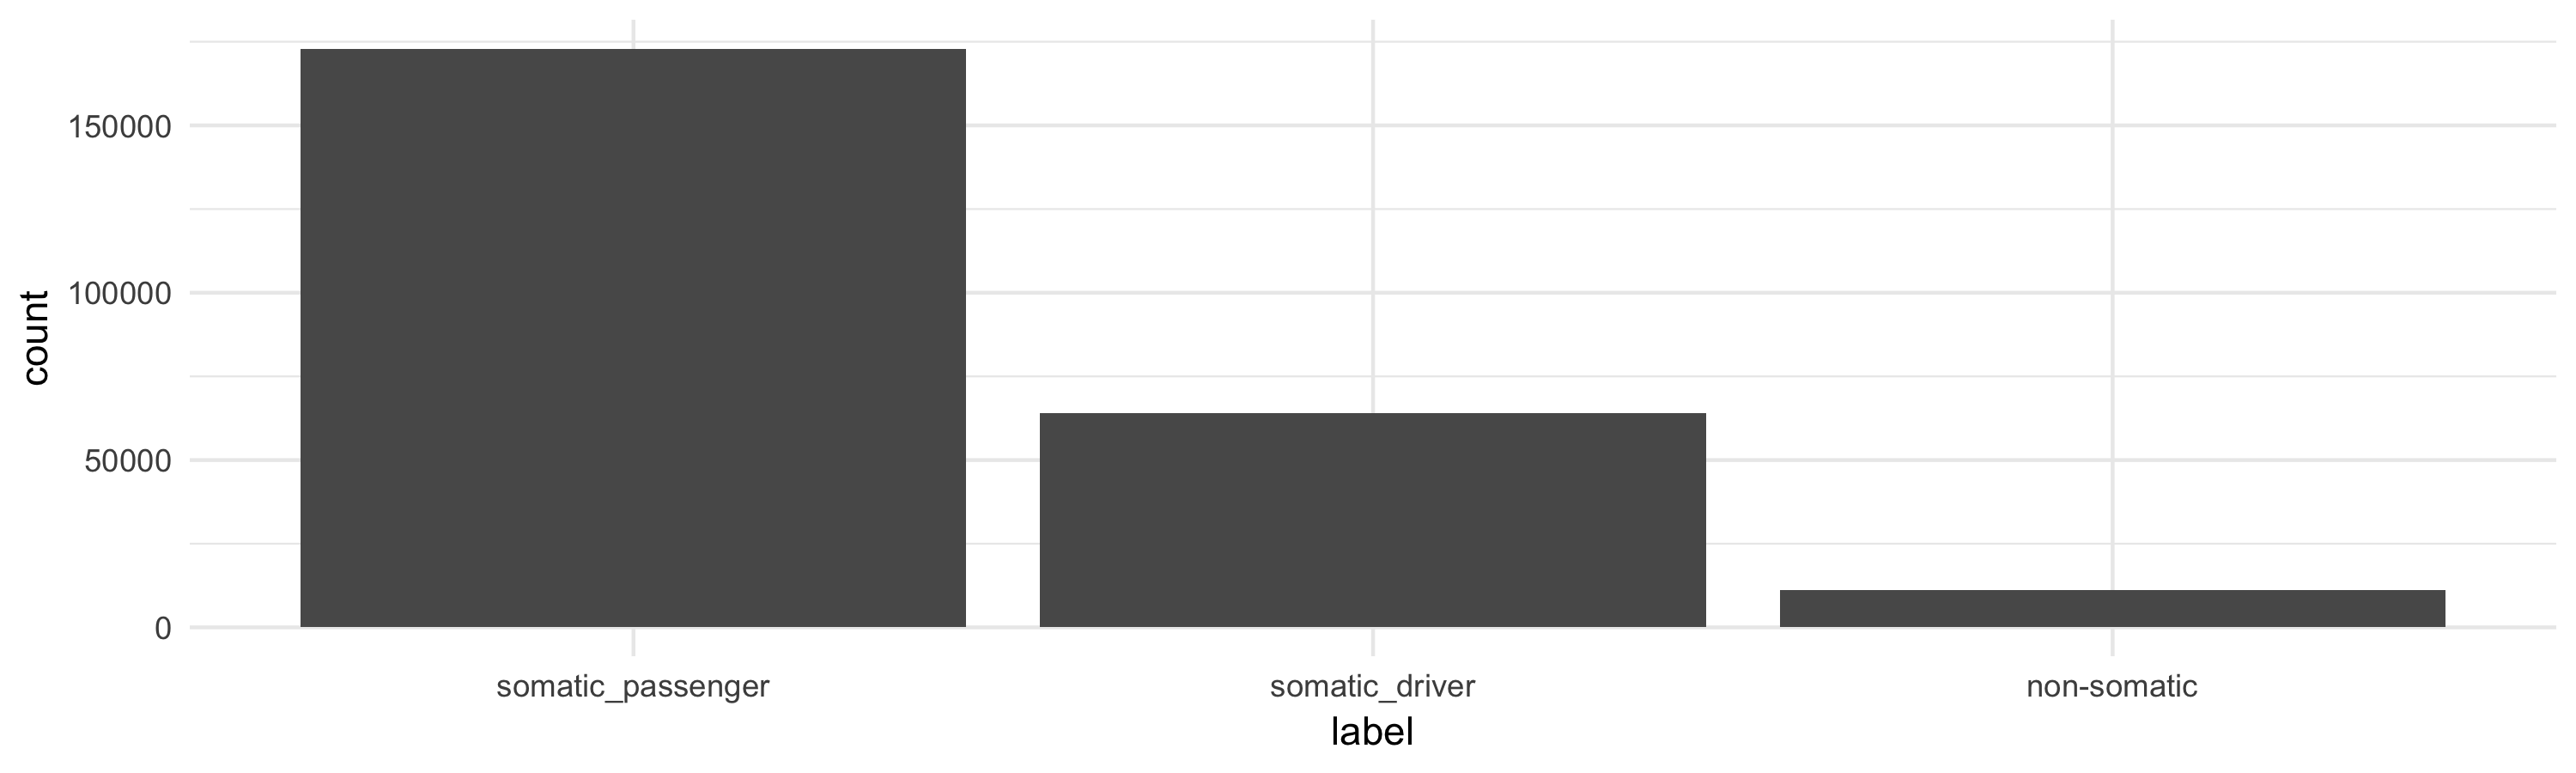

In [28]:
get_table(impact$label)
plot_histogram(impact, "label")

### `label` vs `Consequence`

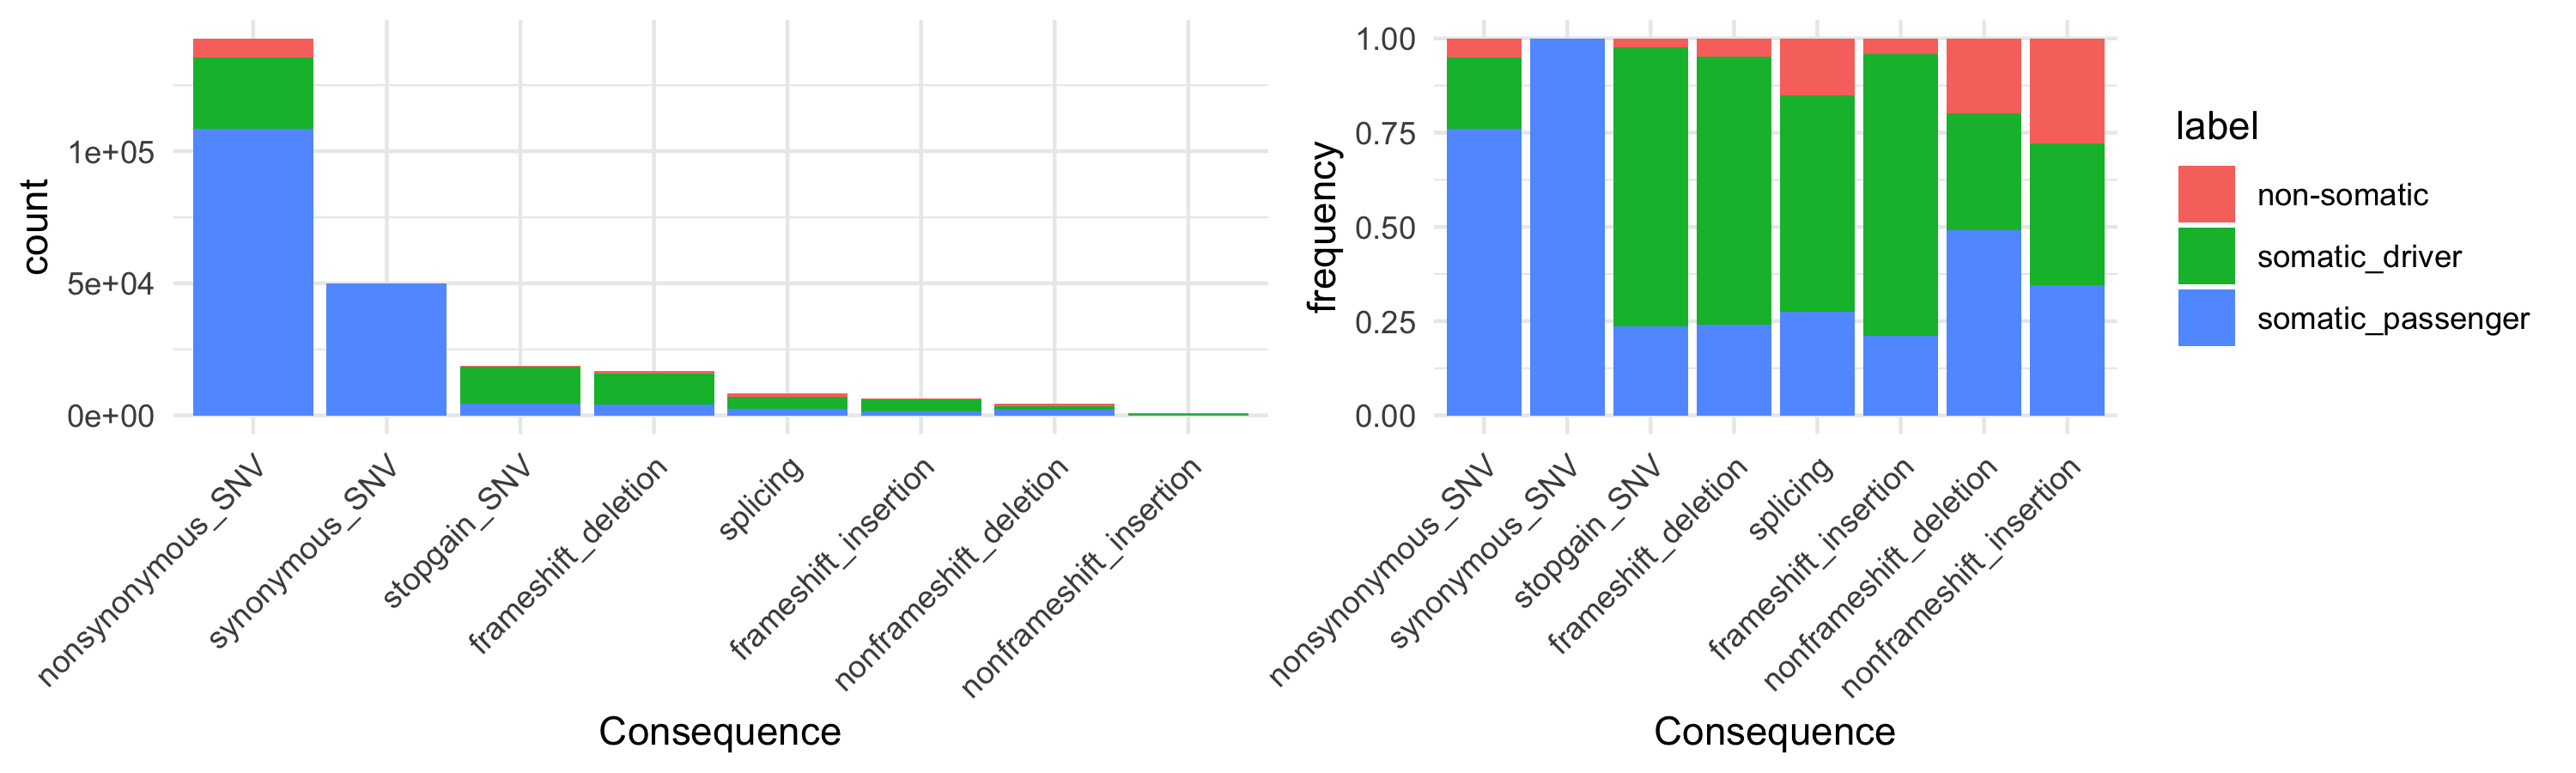

In [29]:
plot_contingency_table_as_histograms(impact, "Consequence", "label")

### Comparison of the `t_vaf`, `Kaviar_AF` and `cosmic_count`

In [45]:
impact <- impact[impact$Consequence != "synonymous_SNV",]

Remove synonymous

Distribution of `t_vaf`, `Kaviar_AF` and `cosmic_count` for the different `label` (warning the second and last plot have a sqrt x and sqrt y scale):

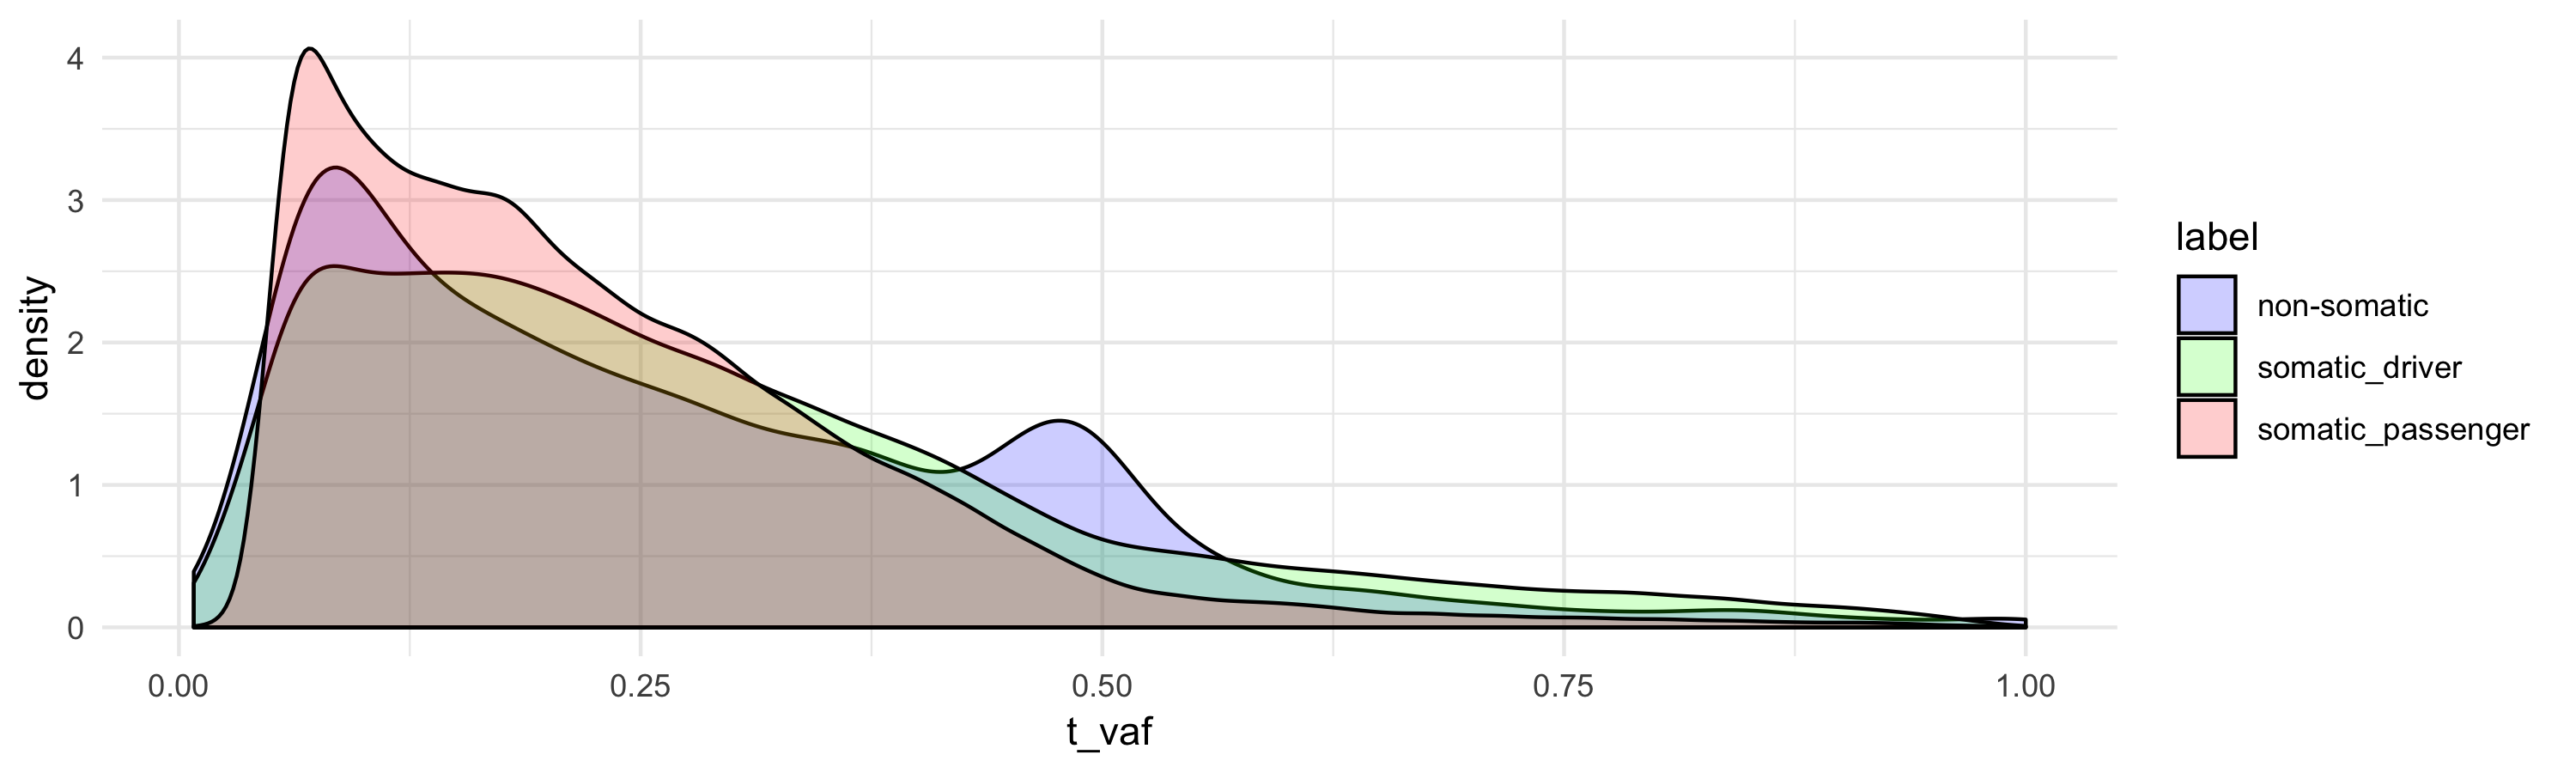

In [46]:
plot_density(impact, "t_vaf", "label")

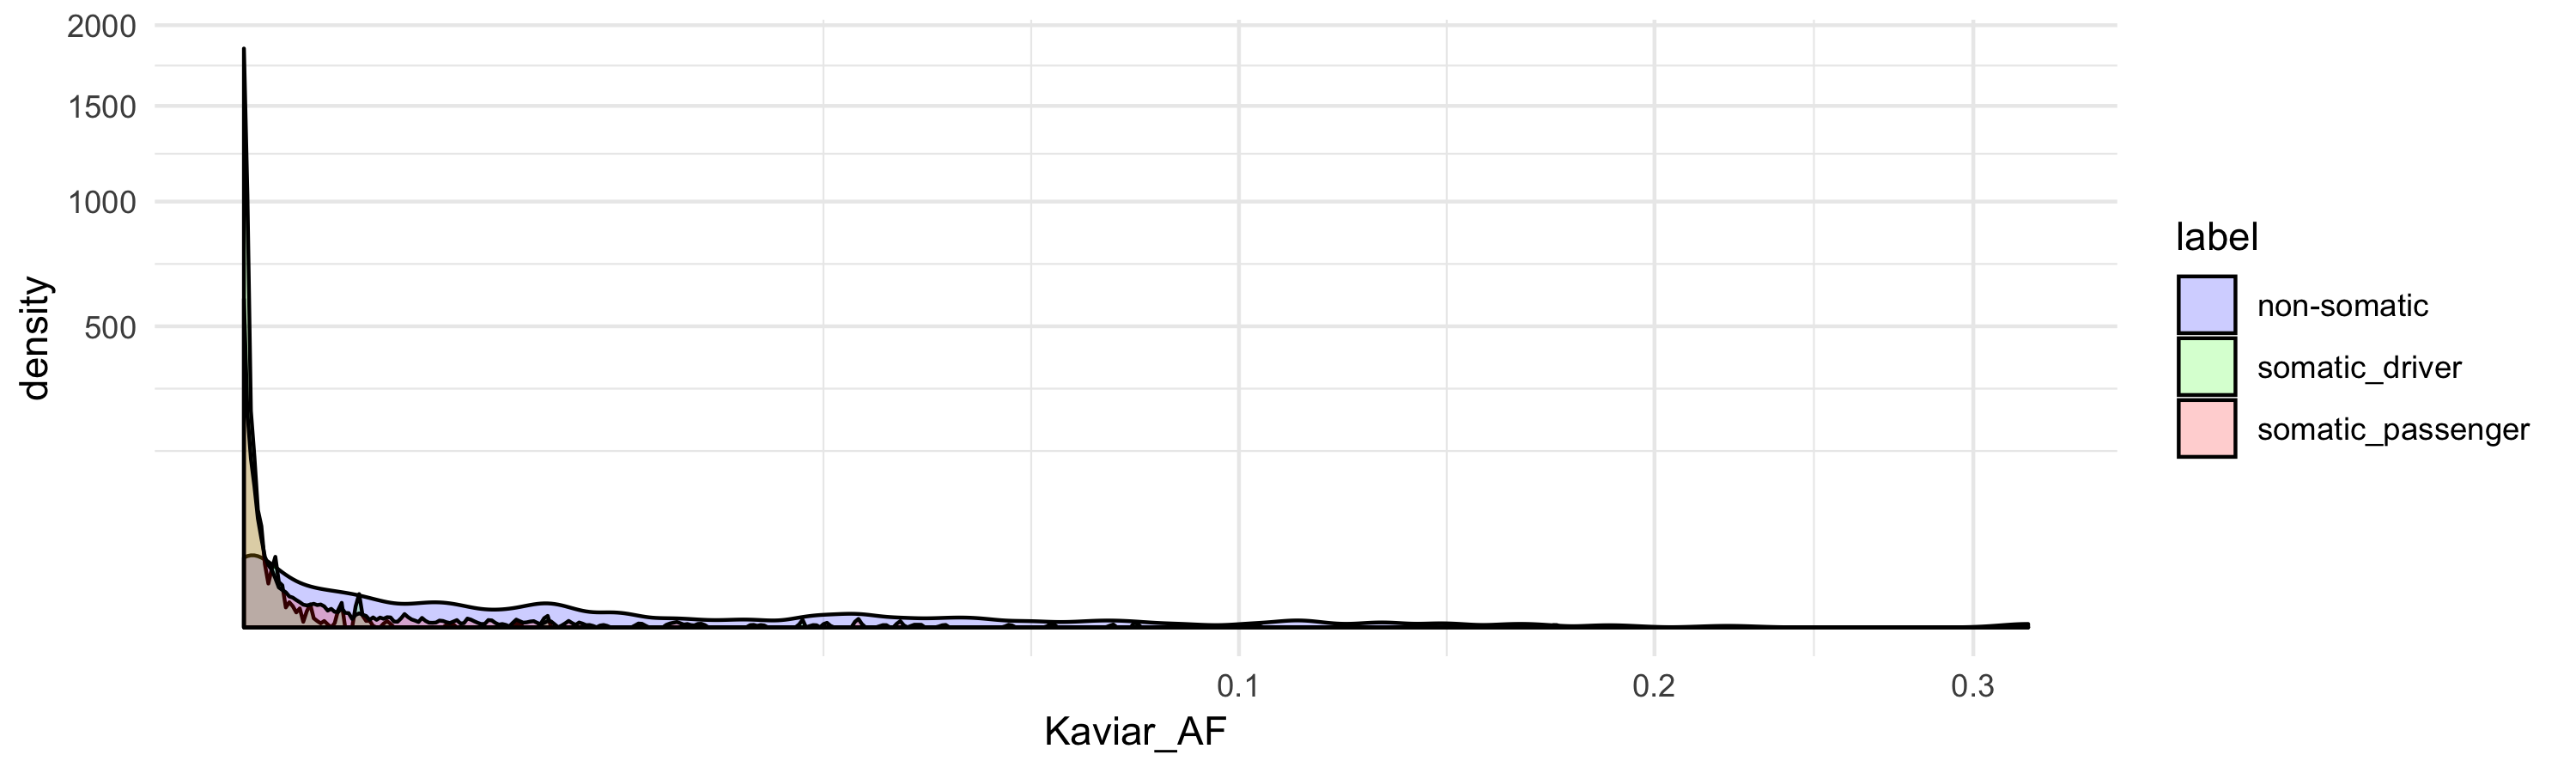

In [47]:
plot_density(impact[impact$Kaviar_AF !=0,], "Kaviar_AF", "label") + scale_x_sqrt() + scale_y_sqrt()

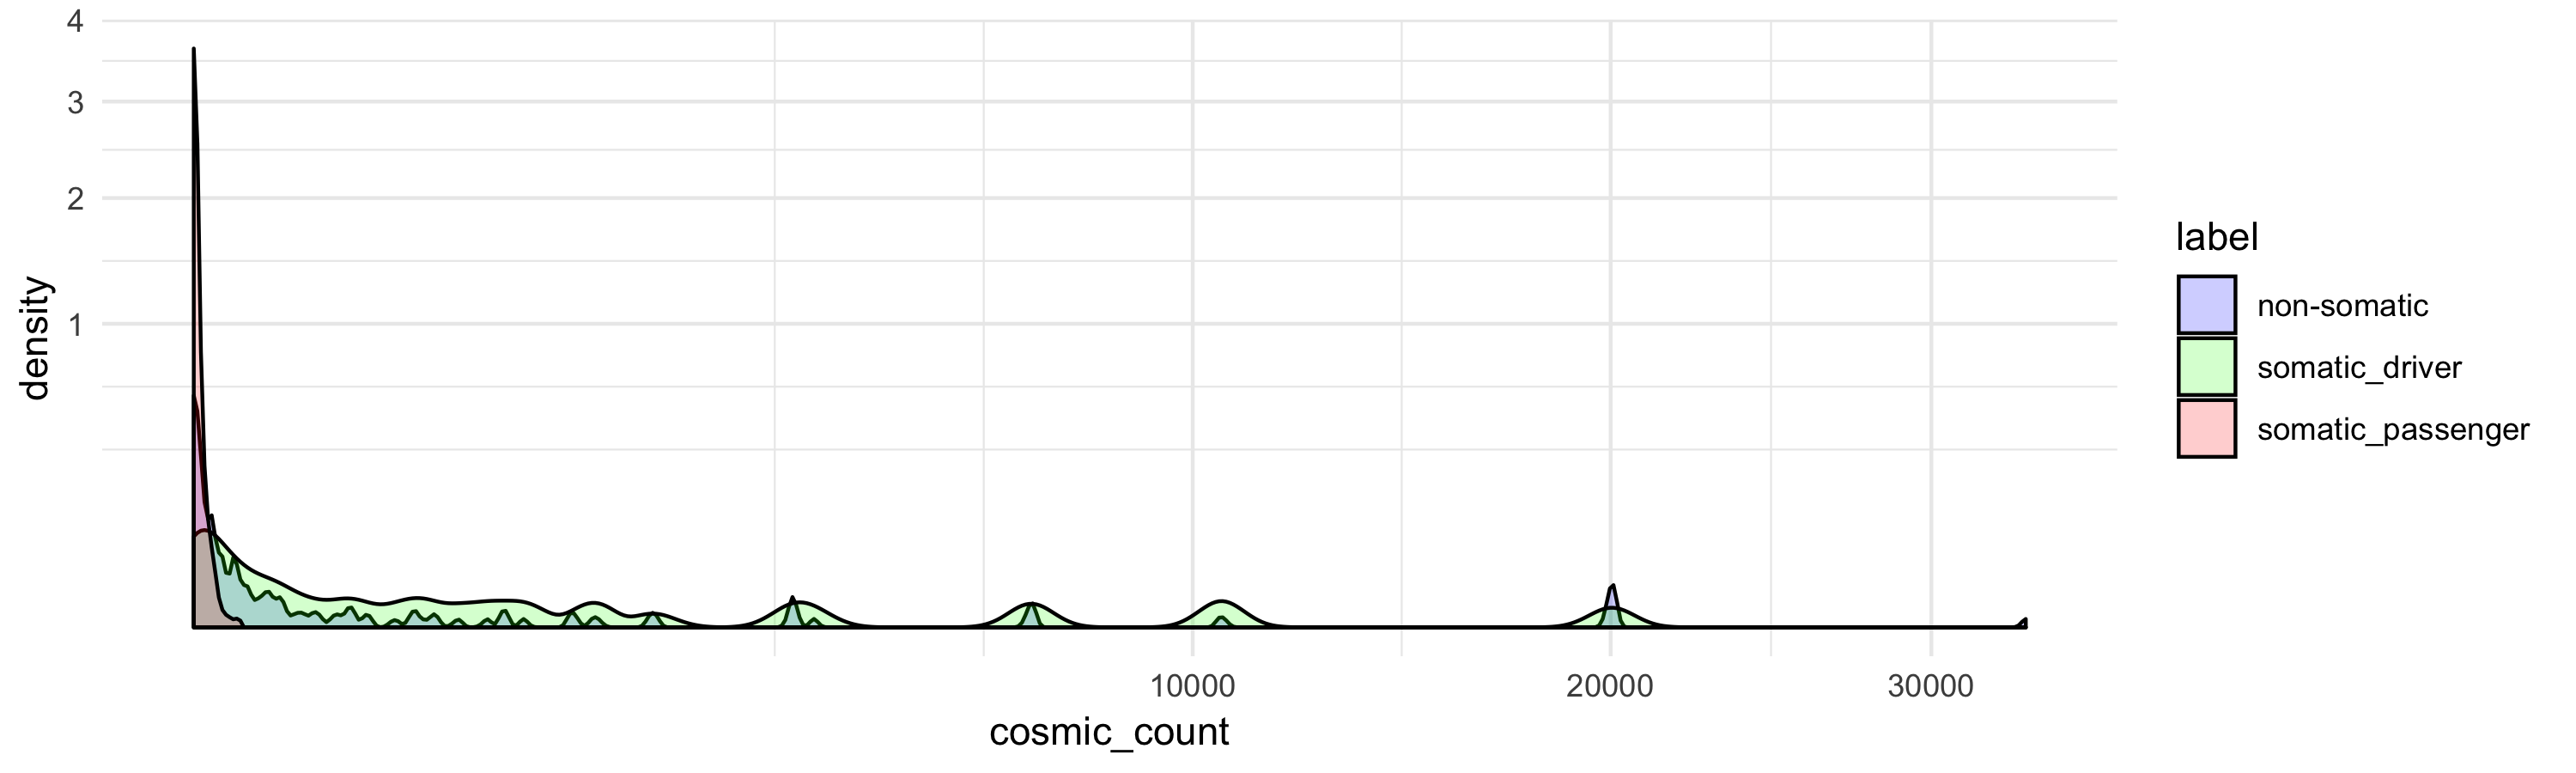

In [48]:
plot_density(impact[impact$cosmic_count !=0,], "cosmic_count", "label") + scale_x_sqrt() + scale_y_sqrt()

## Study of `cosmic_count` for driver vs non-driver mutations

Warning: driver mutations include somatic mutations.

There is not a single variant that is not in OncoKB but have a high `cosmic_count` (the maximum among non-drivers mutations is 46 but the mean is 0.193), see the plot of the `cosmic_count` density below for all the impact mutations and for the non-drivers mutations only (warning this is a sqrt x and y scale):

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   214.9     1.0 33328.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1423  0.0000 28.0000 

[1] "484 over 198288 (0.24%)"

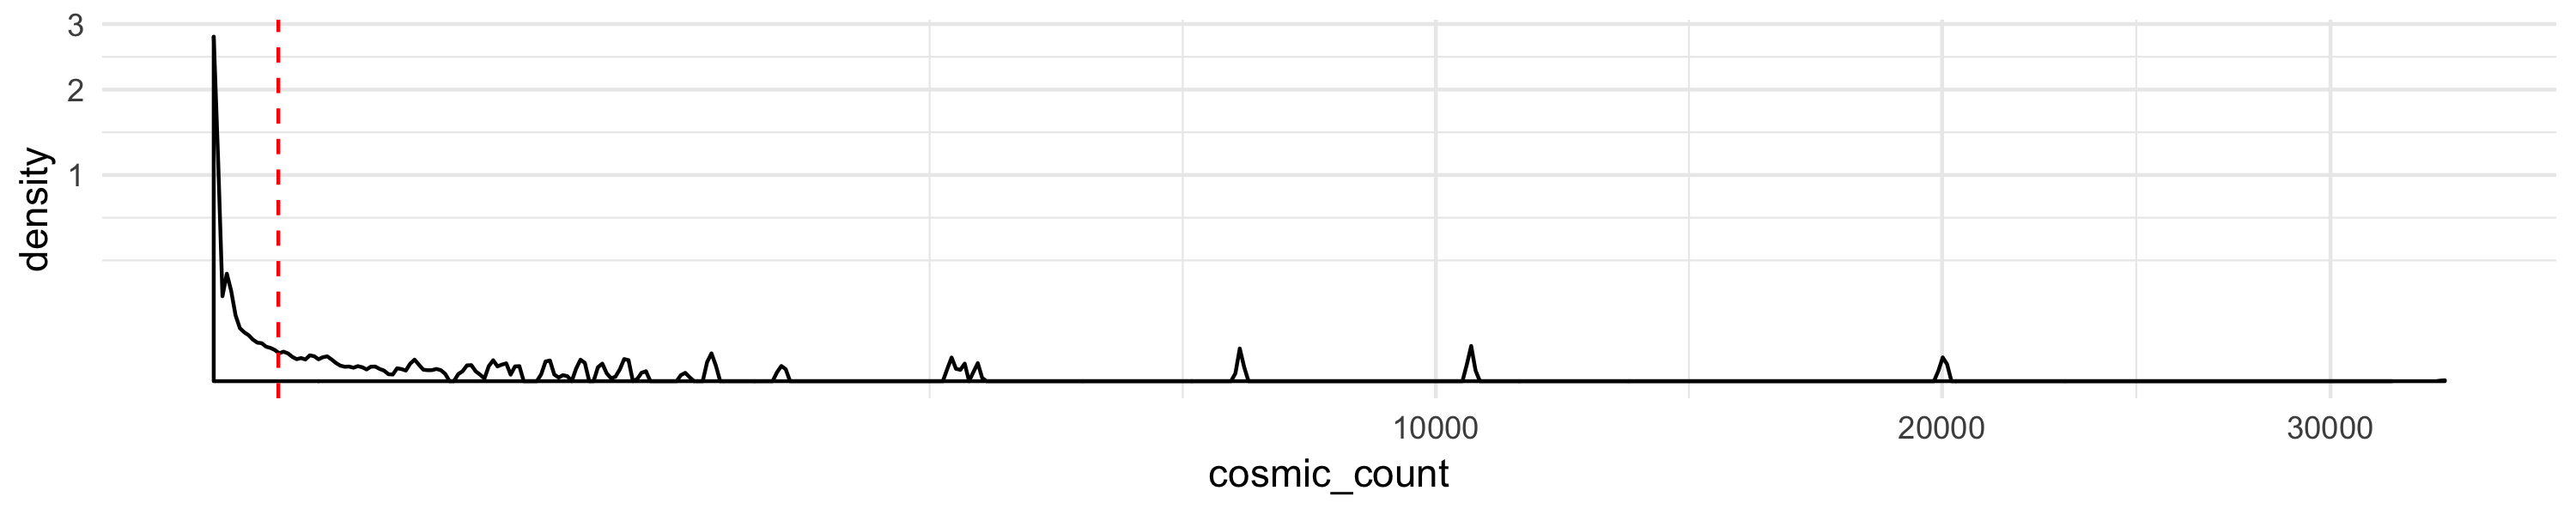

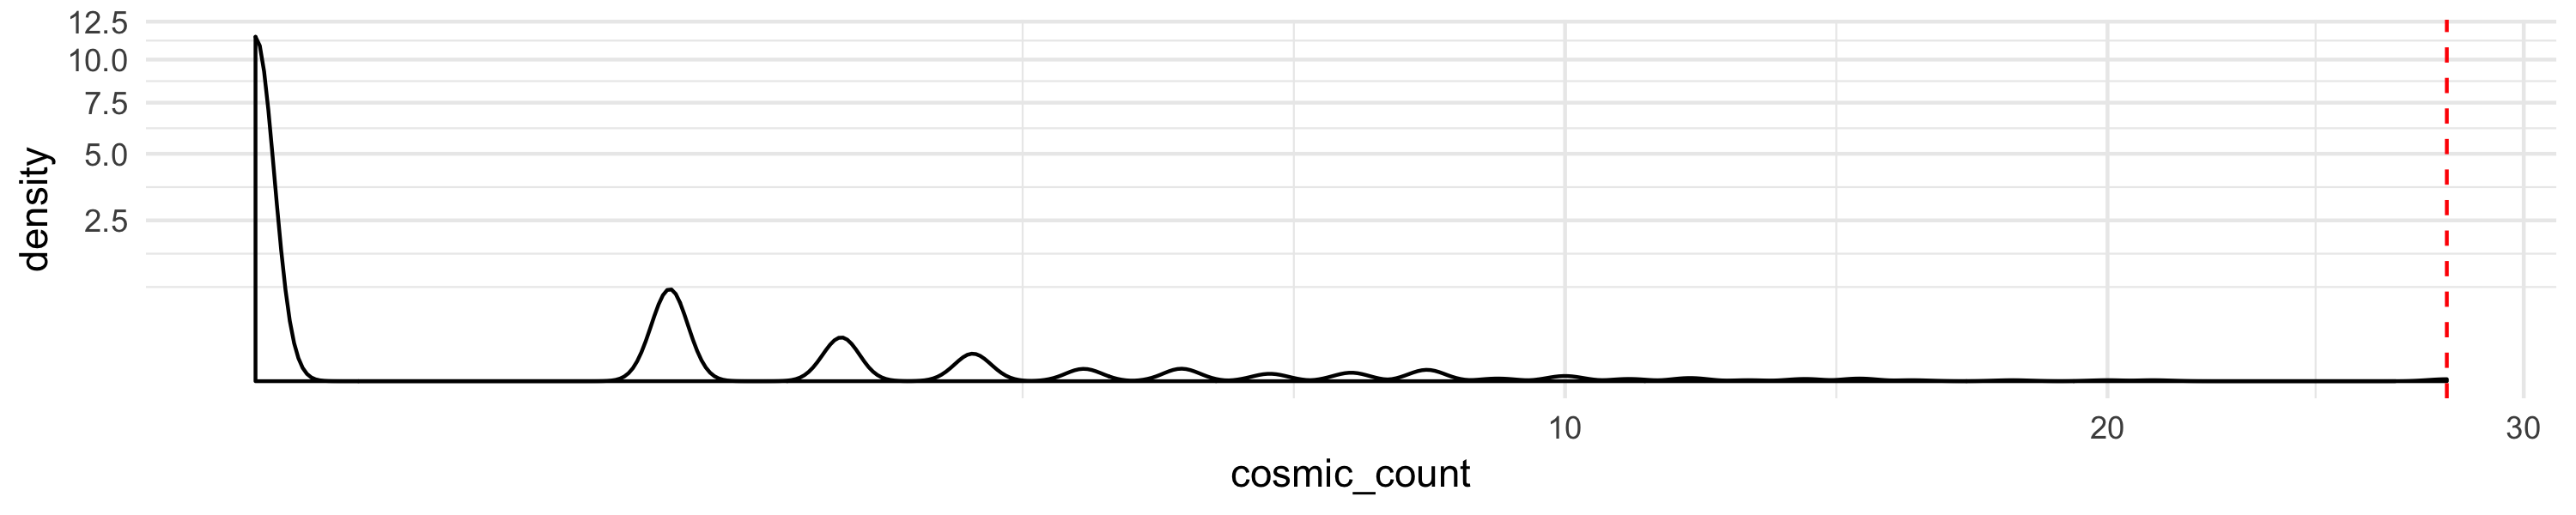

In [55]:
summary(impact$cosmic_count)
summary(impact[impact$driver == "no",]$cosmic_count)

# number of non-driver mutations having a cosmic_count >= 10 among the non-driver mutations
print_count_and_proportion(impact[impact$driver == "no" & impact$cosmic_count >= 5,], impact[impact$driver == "no",]) 

max_non_drivers_cosmic_count = max(impact$cosmic_count[impact$driver == "no"])

plot_density(impact, "cosmic_count", lines = max_non_drivers_cosmic_count, height = 2) +
        scale_x_sqrt() + scale_y_sqrt()
plot_density(impact[impact$driver == "no",], "cosmic_count", lines = max_non_drivers_cosmic_count, height = 2) +
        scale_x_sqrt() + scale_y_sqrt()

In [61]:
impact$gene_type[impact$driver == "no" & impact$cosmic_count >= 5 & impact$Hugo_Symbol == "PIK3CA"]

[1] "oncogene" "oncogene" "oncogene" "oncogene" "oncogene" "oncogene"
 [7] "oncogene" "oncogene" "oncogene" "oncogene" "oncogene" "oncogene"
[13] "oncogene" "oncogene" "oncogene" "oncogene" "oncogene" "oncogene"
[19] "oncogene" "oncogene" "oncogene" "oncogene" "oncogene" "oncogene"
[25] "oncogene" "oncogene" "oncogene" "oncogene" "oncogene" "oncogene"

In [51]:
get_table(impact$Hugo_Symbol[impact$driver == "no" & impact$cosmic_count >= 5])

values,count,freq
NOTCH2,56,11.6%
KDM5A,52,10.7%
CARD11,52,10.7%
GLI1,48,9.9%
PIK3CA,30,6.2%
CSF3R,18,3.7%
ATM,15,3.1%
ZFHX3,14,2.9%
EGFR,13,2.7%
RB1,12,2.5%


However, there are variant that are classified as drivers but have a really low `cosmic_count` (actually 42% of them have a null `cosmic_count`):

In [17]:
summary(impact[impact$driver == "yes",]$cosmic_count)

# number of driver mutations having a cosmic_count = 0 among the driver mutations
print_count_and_proportion(impact[impact$driver == "yes" & impact$cosmic_count == 0,], impact[impact$driver == "yes",])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     1.0   641.4    39.0 33328.0 

[1] "28225 over 66394 (42.51%)"

print quantiles

## Study of reccurence among driver mutations

We will follow the methodology from `coding_mutations_analysis.ipynb`.

### Identify the reccurent mutations

We need to study the reccurence of mutations taking care not to consider a mutation as recurrent if it comes frome the same patient. To do so we will group the rows by patient, and select only the distinct mutations for each patient:

In [62]:
impact$patient_id <- substr(impact$Tumor_Sample_Barcode, 1, 9) # create a patient id
impact_unique_mut_keys_per_patient <- as.data.frame(impact %>% group_by(patient_id) %>%
                                                               select(patient_id,
                                                                      mut_key,
                                                                      Hugo_Symbol,
                                                                      Consequence,
                                                                      Variant_Type,
                                                                      class,
                                                                      driver,
                                                                      oncogenic) %>%
                                                               filter(! duplicated(mut_key)))
head(impact_unique_mut_keys_per_patient)

patient_id,mut_key,Hugo_Symbol,Consequence,Variant_Type,class,driver,oncogenic
P-0000012,17_7577515_T_G,TP53,nonsynonymous_SNV,SNP,somatic,yes,Oncogenic
P-0000012,1_46521514_G_C,PIK3R3,nonsynonymous_SNV,SNP,somatic,no,Unknown
P-0000012,3_142178126_C_A,ATR,nonsynonymous_SNV,SNP,somatic,no,Unknown
P-0000012,4_55139732_T_A,PDGFRA,nonsynonymous_SNV,SNP,somatic,no,Unknown
P-0000012,4_153249542_C_A,FBXW7,splicing,SNP,somatic,yes,Likely Oncogenic
P-0000012,4_153332775_C_A,FBXW7,stopgain_SNV,SNP,somatic,yes,Likely Oncogenic


In [63]:
drivers <- impact_unique_mut_keys_per_patient[impact_unique_mut_keys_per_patient$driver == "yes",]
print_count_and_proportion(drivers, impact_unique_mut_keys_per_patient)

[1] "63207 over 190551 (33.17%)"

In [64]:
mut_key_info <- as.data.frame(drivers %>% group_by(mut_key) %>% summarise(count = n(),
                                                                          Hugo_Symbol = unique(Hugo_Symbol)))
head(mut_key_info)

mut_key,count,Hugo_Symbol
1_11168338_C_T,1,MTOR
1_11169361_C_G,1,MTOR
1_11169375_A_C,1,MTOR
1_11169376_A_T,3,MTOR
1_11169377_T_A,3,MTOR
1_11174395_A_C,4,MTOR


In [65]:
source("../../../src/utils/custom_tools.R")

In [66]:
for (threshold in c(2, 3, 5, 10)) {
    
    mut_key_info_threshold <- mut_key_info[mut_key_info$count >= threshold,]
    
    impact_unique_mut_keys_per_patient_threshold <- impact_unique_mut_keys_per_patient[
                                                            impact_unique_mut_keys_per_patient$mut_key
                                                            %in% mut_key_info_threshold$mut_key,]
    
    print(sprintf("%s keys are shared by at least %2d samples [%s rows concerned]",
                  print_count_and_proportion(mut_key_info_threshold, mut_key_info, 5, 5),
                  threshold,
                  print_count_and_proportion(impact_unique_mut_keys_per_patient_threshold,
                                             impact_unique_mut_keys_per_patient)))
}

[1] " 5955 over 26831 (22.19%) keys are shared by at least  2 samples [42331 over 190551 (22.22%) rows concerned]"
[1] " 3209 over 26831 (11.96%) keys are shared by at least  3 samples [36839 over 190551 (19.33%) rows concerned]"
[1] " 1621 over 26831 ( 6.04%) keys are shared by at least  5 samples [31524 over 190551 (16.54%) rows concerned]"
[1] "  712 over 26831 ( 2.65%) keys are shared by at least 10 samples [25783 over 190551 (13.53%) rows concerned]"


Distribution of the mutations key count for the mutations present in at least 2 samples (warning this is a sqrt x and y scale):

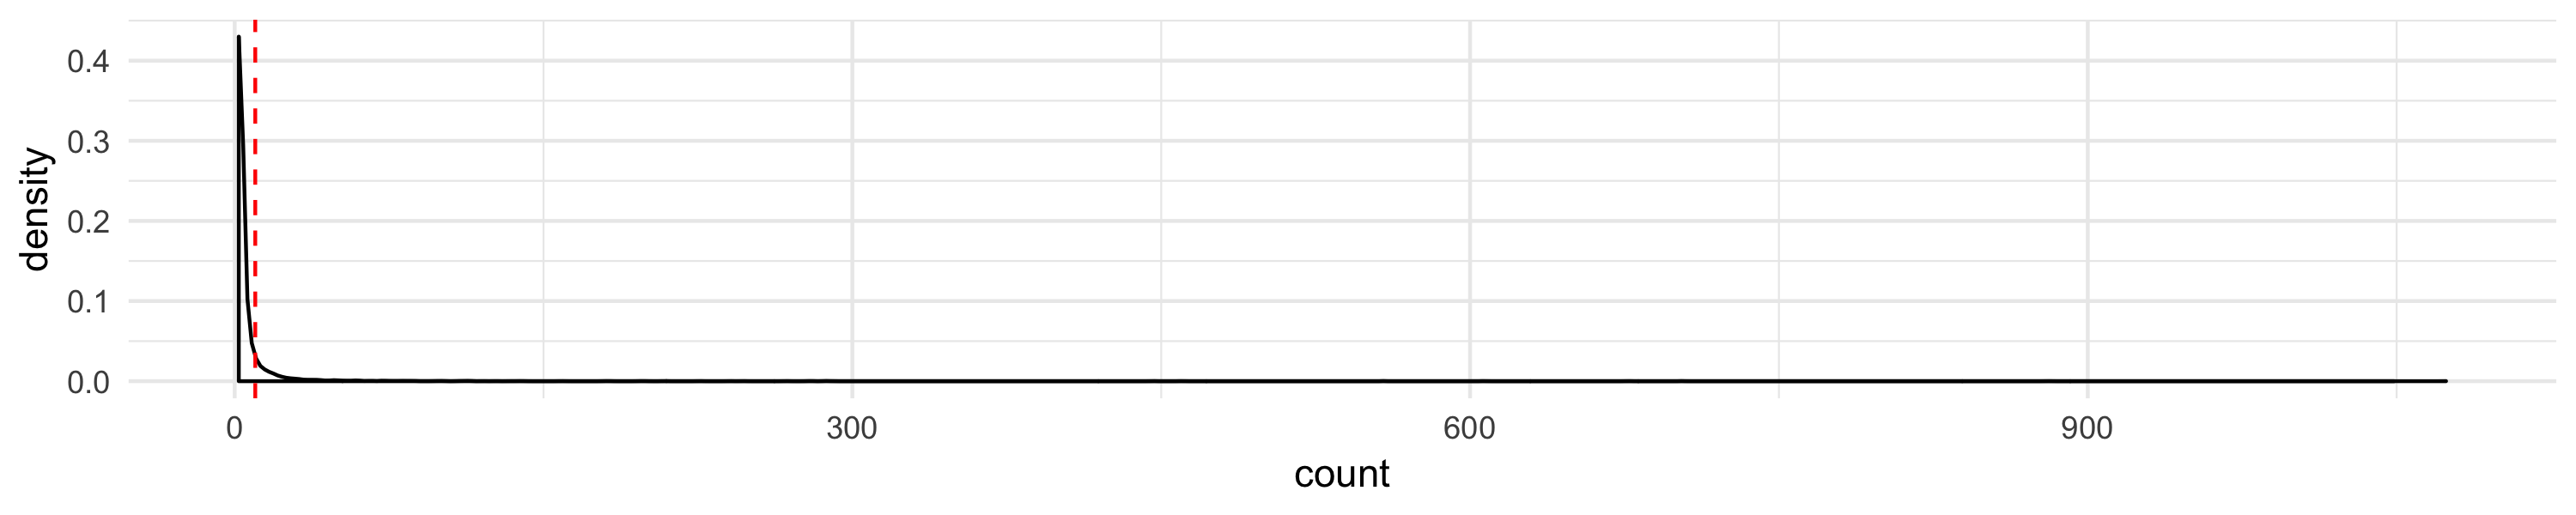

In [71]:
repeated_key <- mut_key_info[mut_key_info$count >= 2,] # keys shared by at least 2 samples
plot_density(repeated_key, "count", lines = 10, height = 2)

### Sudy the reccurent mutations genes

In [68]:
length(unique(repeated_key$Hugo_Symbol))

[1] 254

Here is a plot of the genes that are the most mutated **accross the mutation keys**:

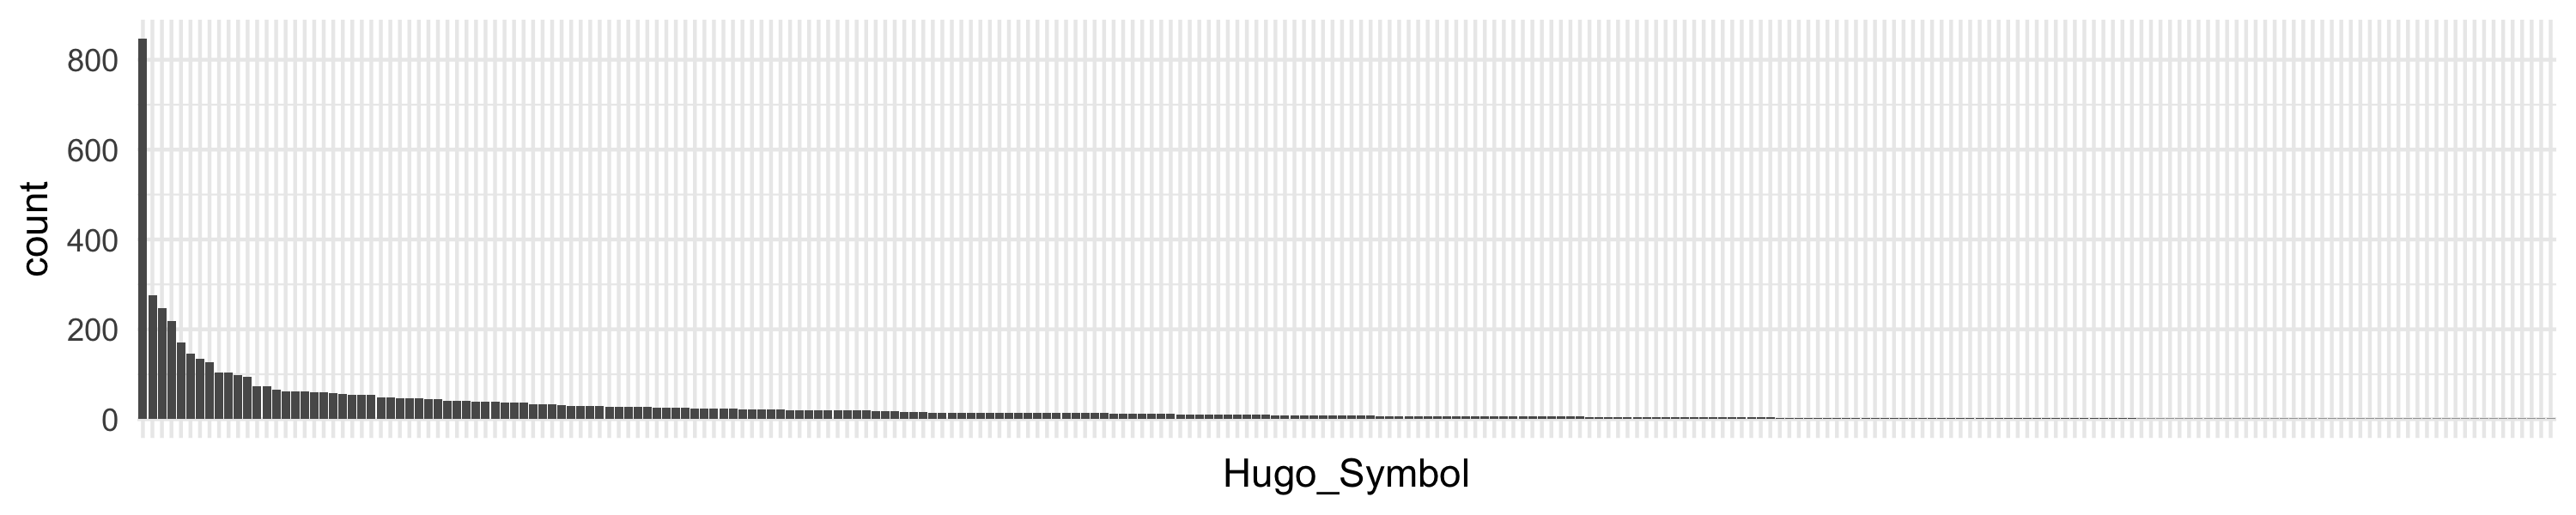

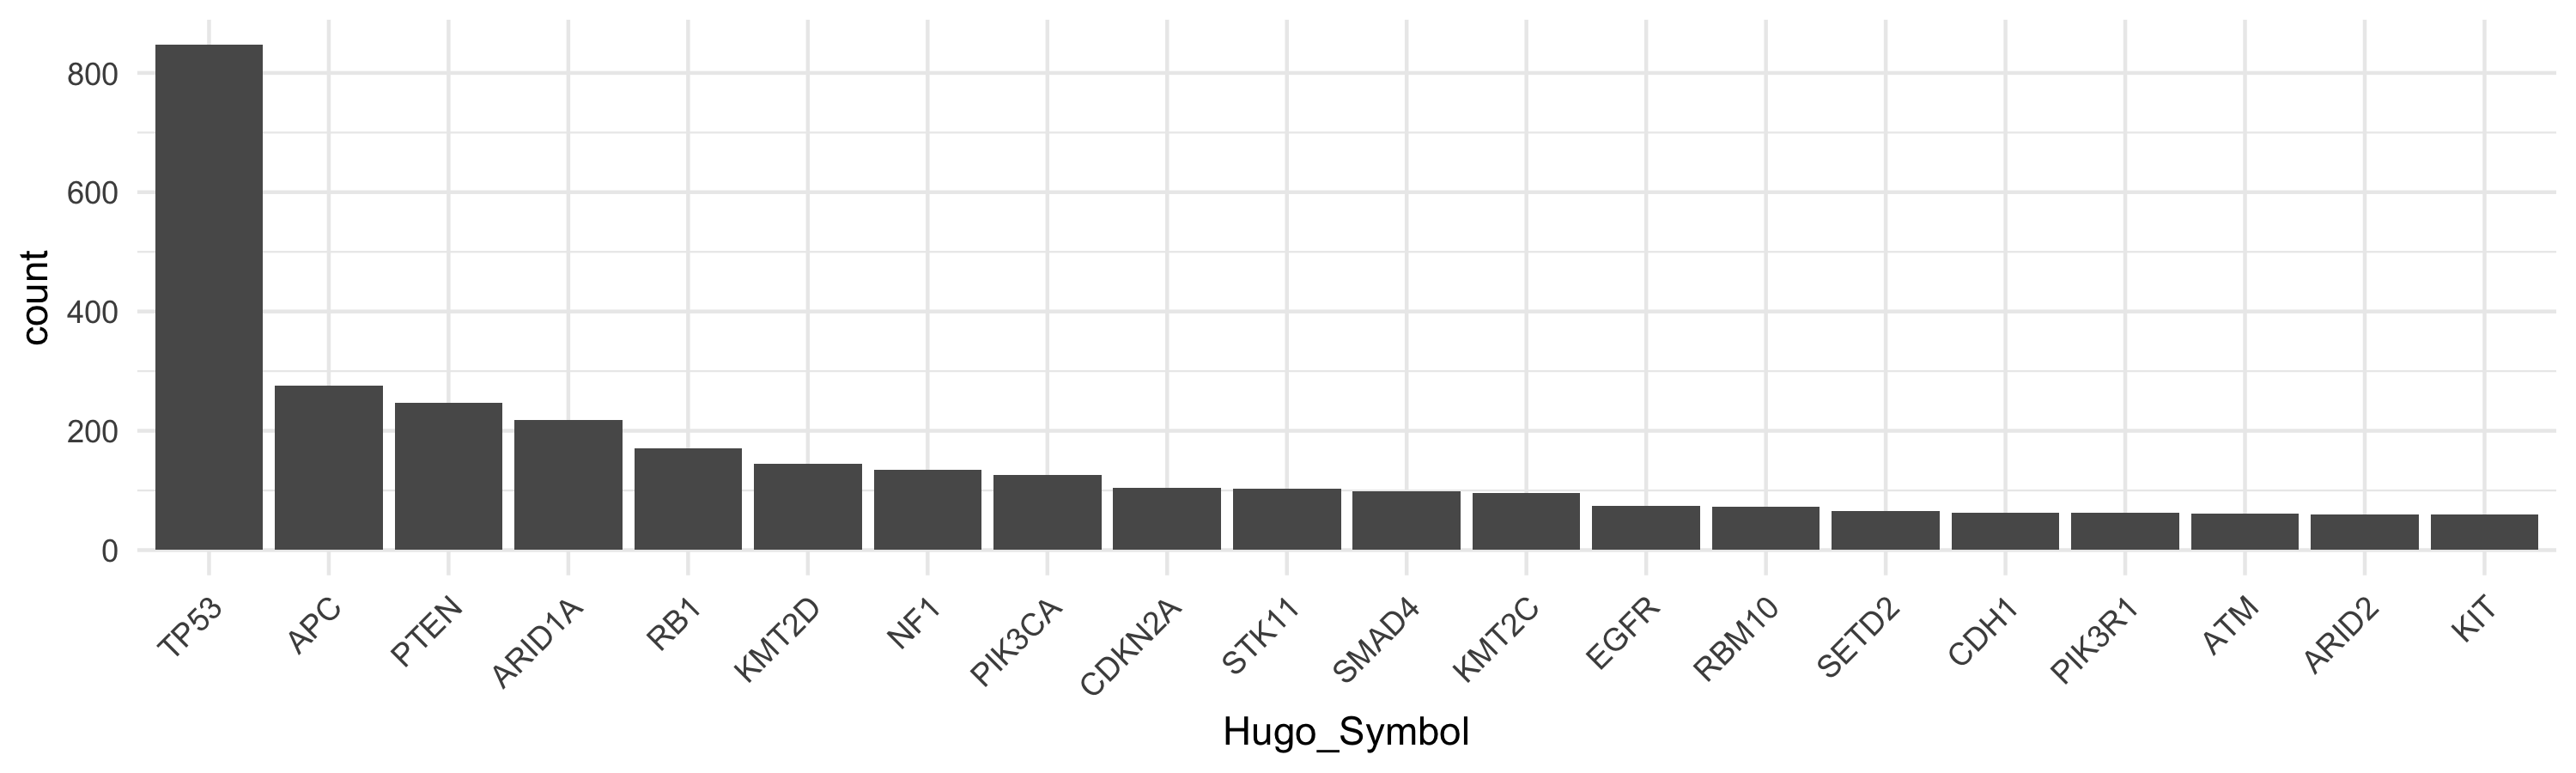

In [69]:
repeated_key <- sort_histogram(repeated_key, "Hugo_Symbol")
notebook_plot_size(10, 2)
ggplot(repeated_key) + geom_bar(aes(Hugo_Symbol)) + theme(axis.text.x = element_blank())
plot_histogram_top(repeated_key, "Hugo_Symbol", 20) + tilt_x_label_45()

Here is a plot of the genes that are the most mutated **accross the rows**:

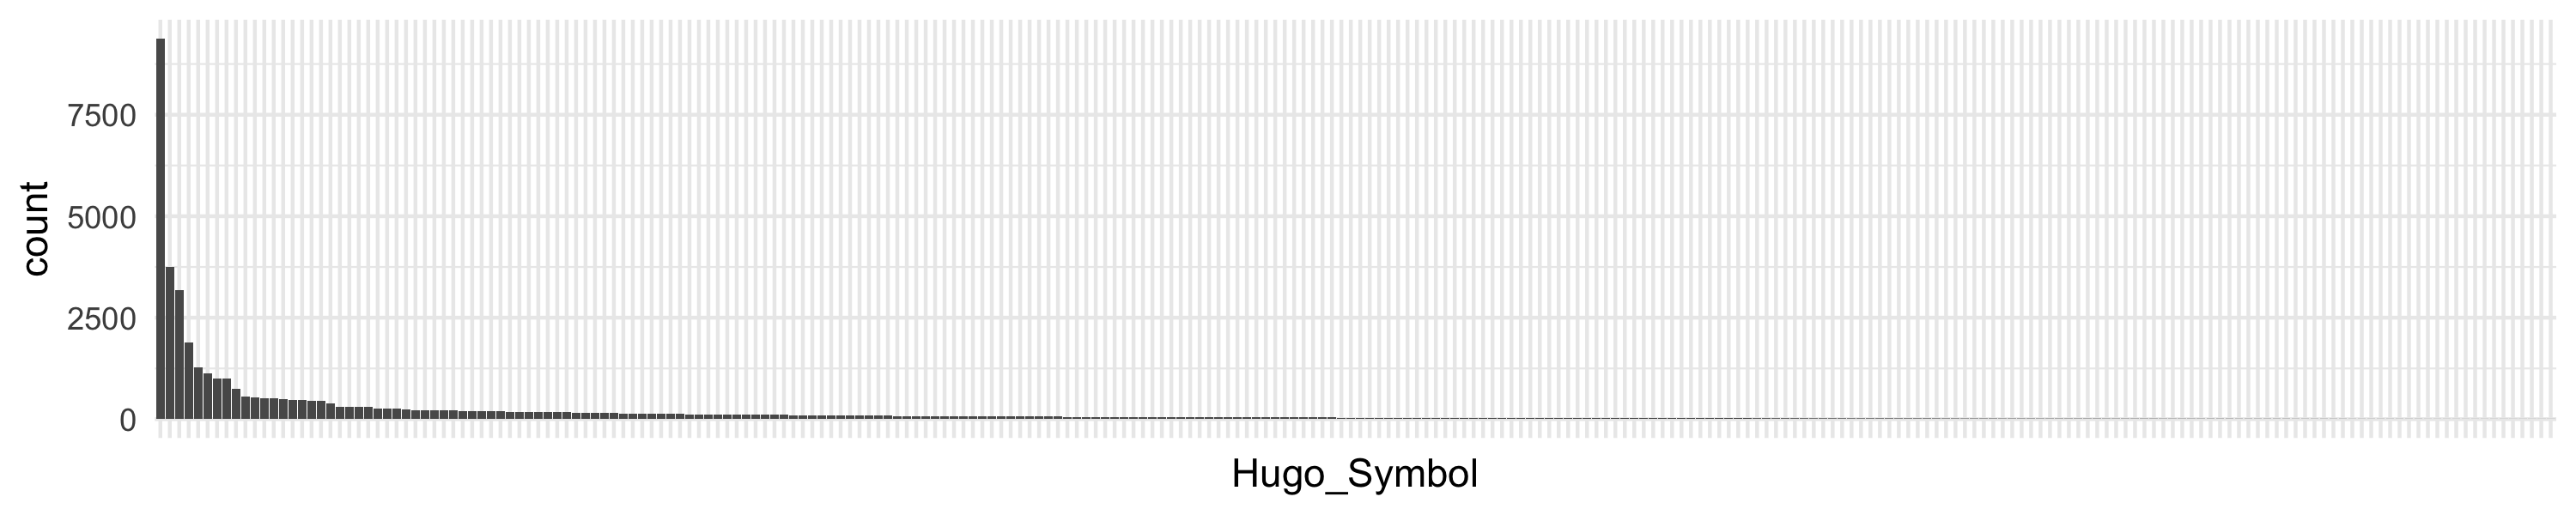

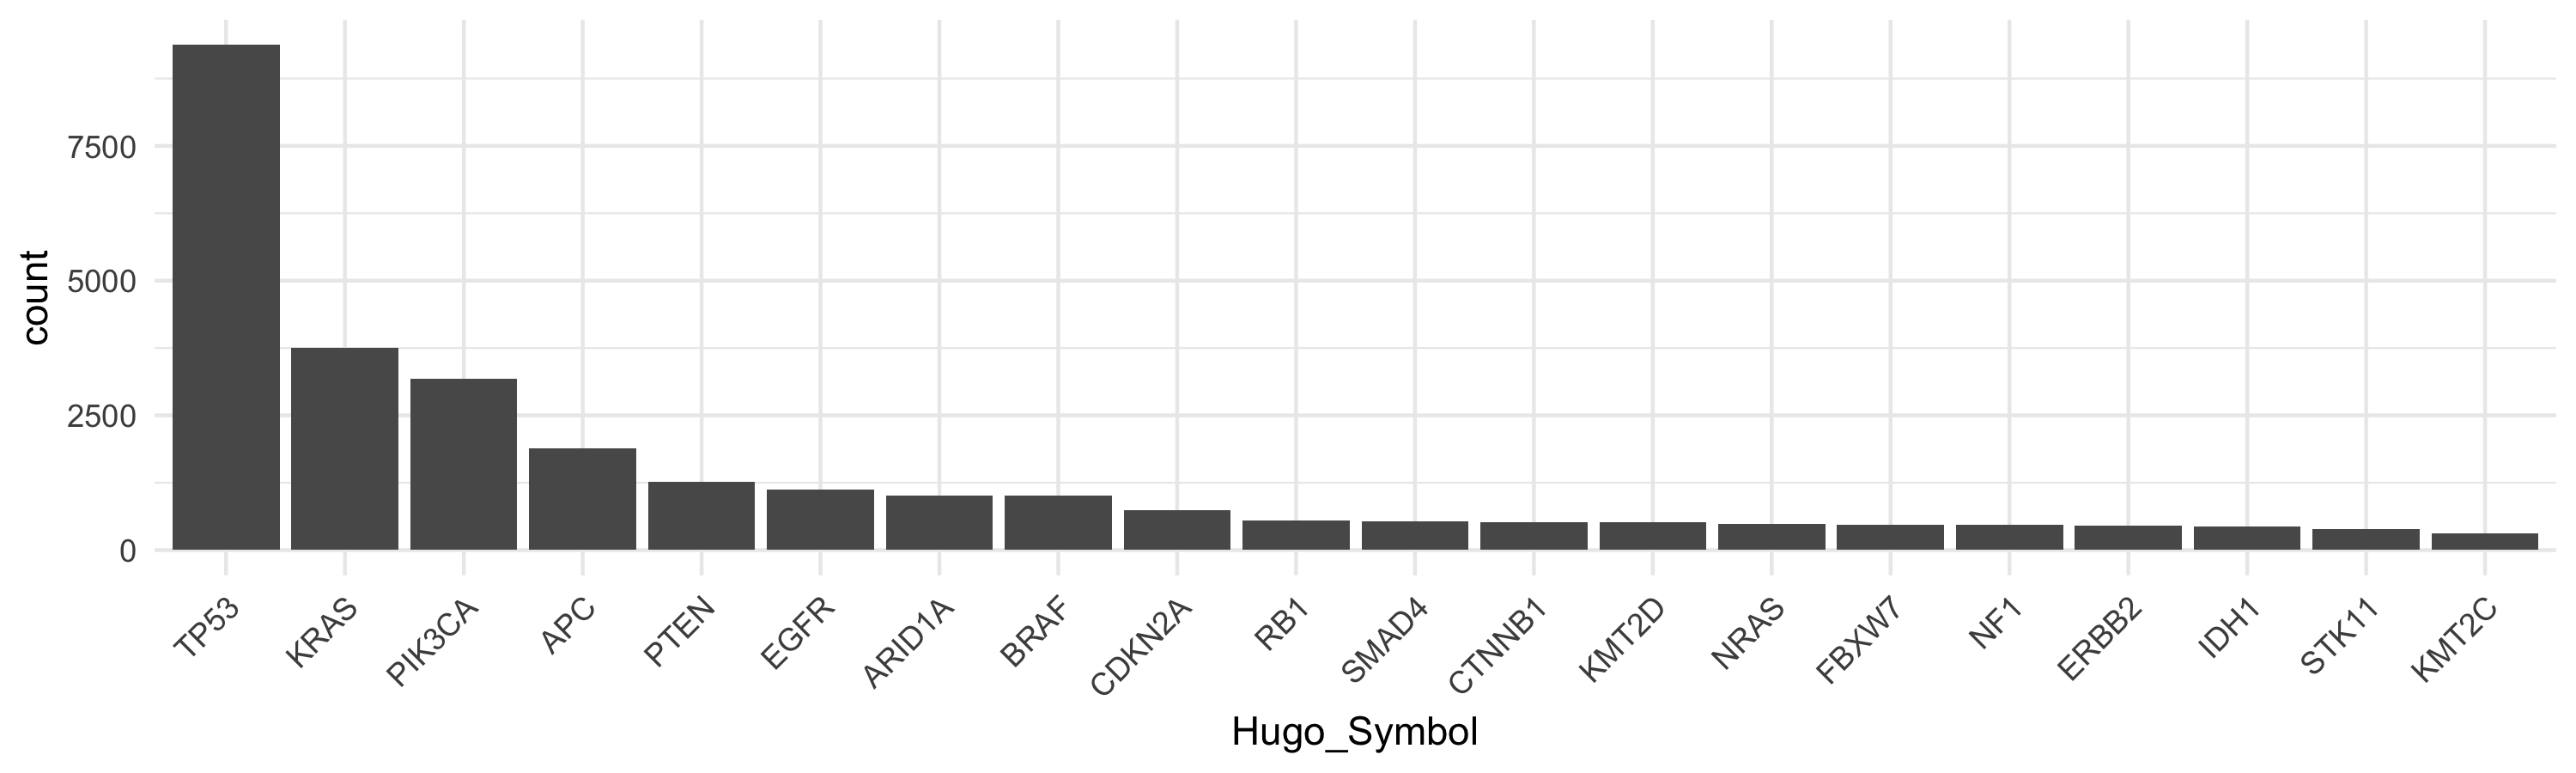

In [70]:
rec_impact <- impact_unique_mut_keys_per_patient[impact_unique_mut_keys_per_patient$mut_key %in% repeated_key$mut_key,]

rec_impact <- sort_histogram(rec_impact, "Hugo_Symbol")
notebook_plot_size(10, 2)
ggplot(rec_impact) + geom_bar(aes(Hugo_Symbol)) + theme(axis.text.x = element_blank())
plot_histogram_top(rec_impact, "Hugo_Symbol", 20) + tilt_x_label_45()

## Study of `is_a_hostpost`, `is_a_3d_hostpot`

We won't study the `is_a_3d_hotspot` feature as it is mostly included in the `is_a_hostpot` feature:

[1] "925 over 198288 (0.47%)"

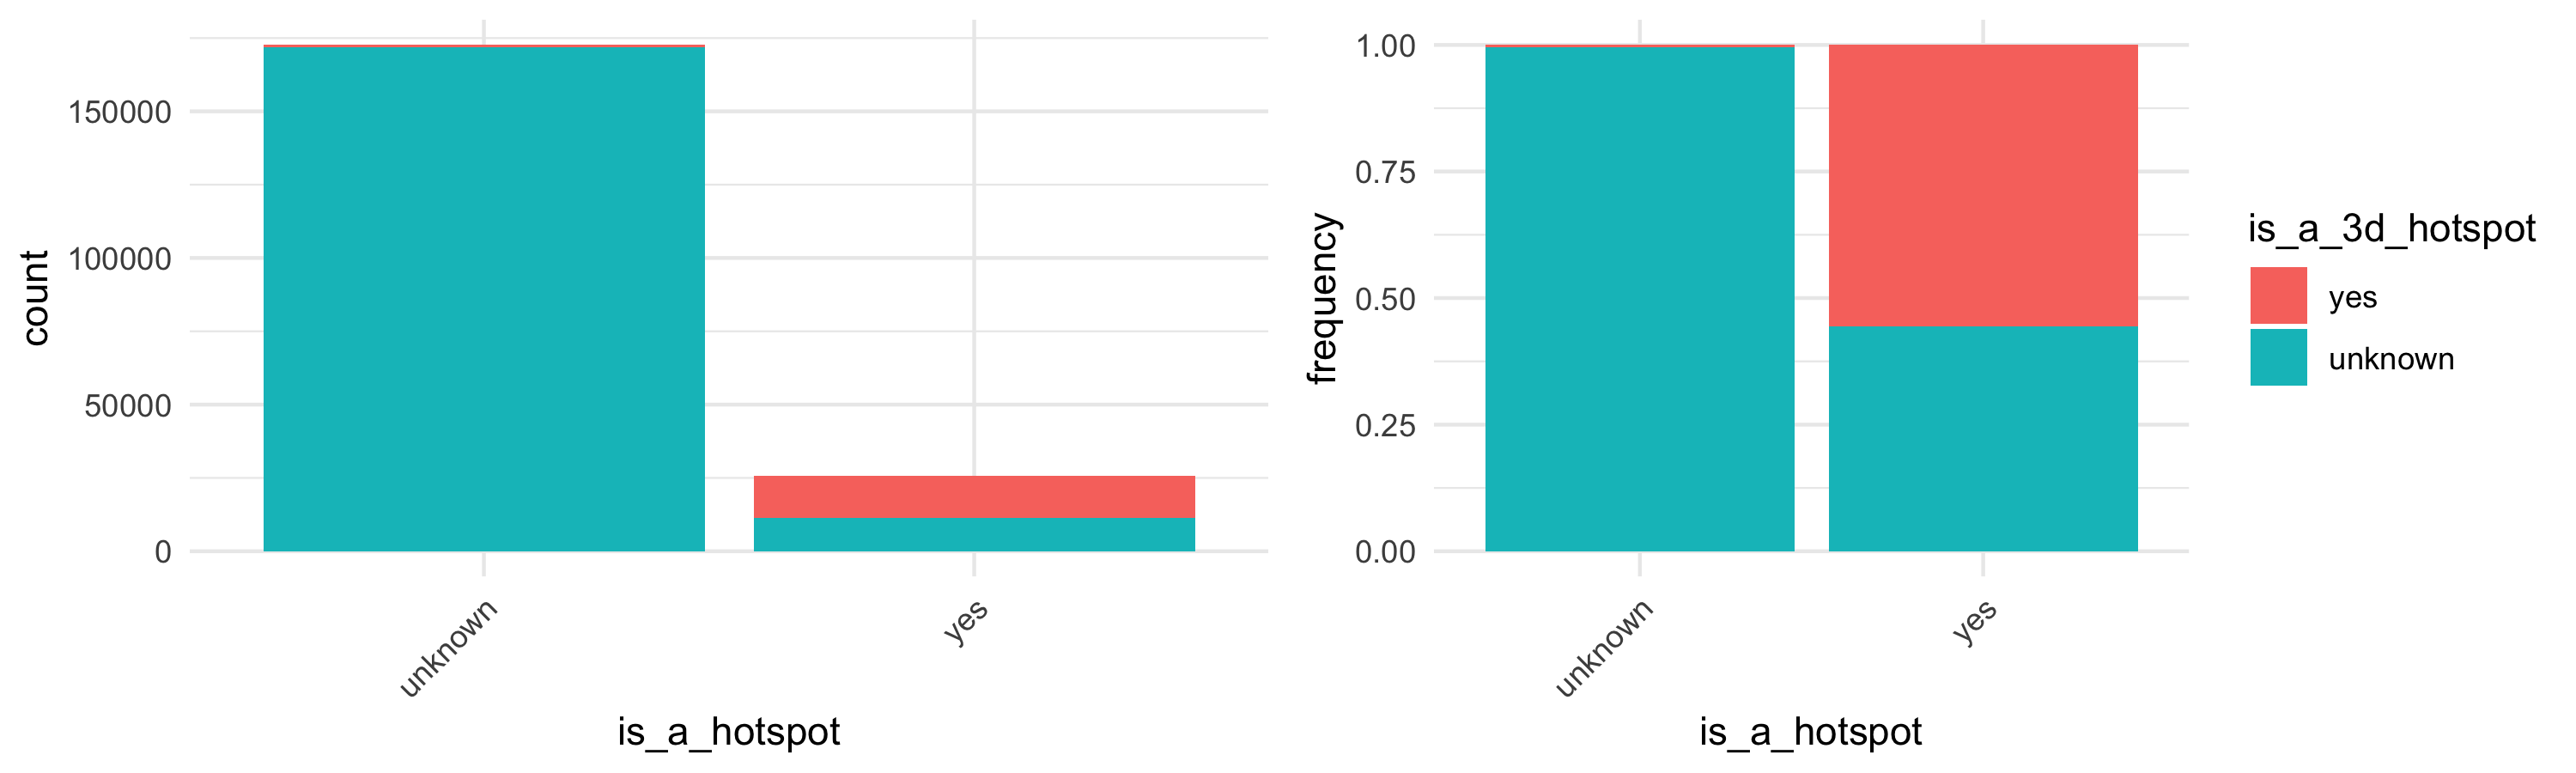

In [72]:
# number of 3d_hotspot mutations not being simple hotspot among the dataset
print_count_and_proportion(impact[impact$is_a_3d_hotspot == "yes" & impact$is_a_hotspot == "unknown",], impact)
plot_contingency_table_as_histograms(impact, "is_a_hotspot", "is_a_3d_hotspot")

It seems that the hostpot study focuses only on the `nonsynonymous_SNV` mutations:


unknown     yes 
 172656   25632 

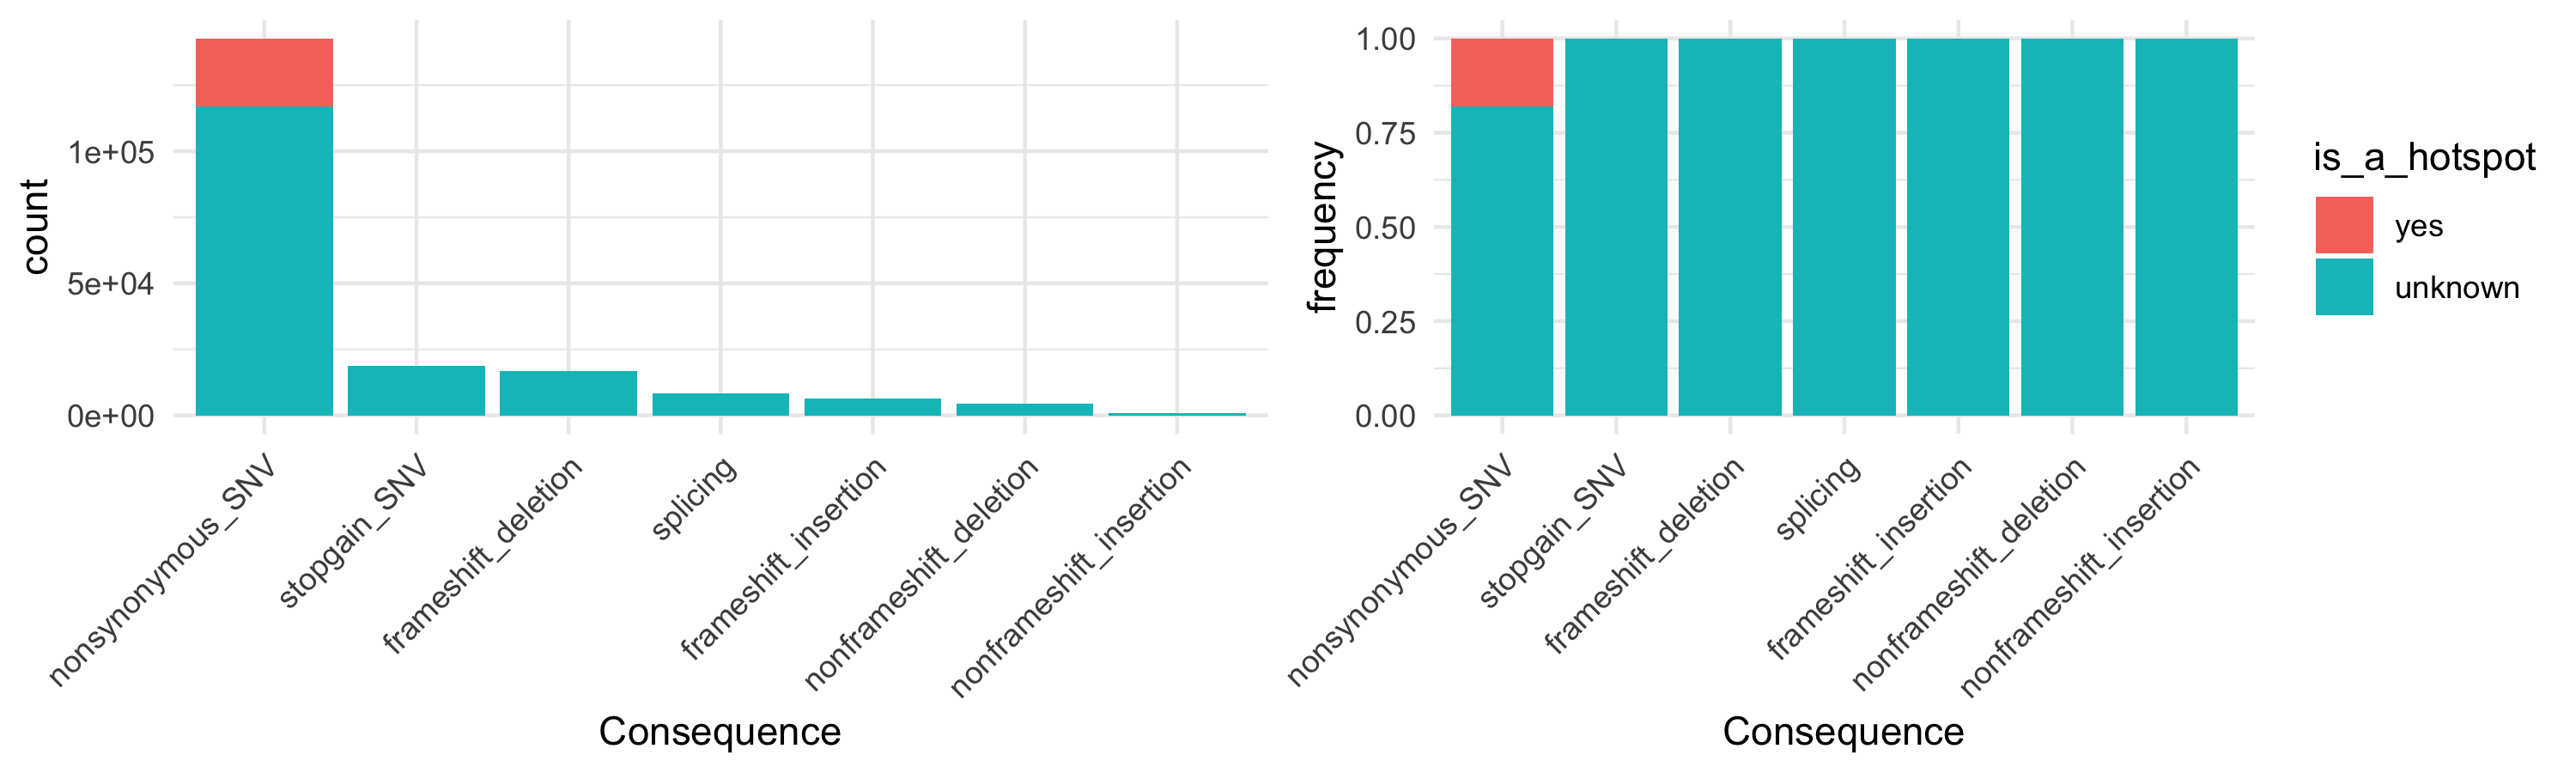

In [73]:
table(impact$is_a_hotspot)
plot_contingency_table_as_histograms(impact, "Consequence", "is_a_hotspot")

Some of the somatic mutations are hotspot:  
<font color='red'> Elsa? </font>

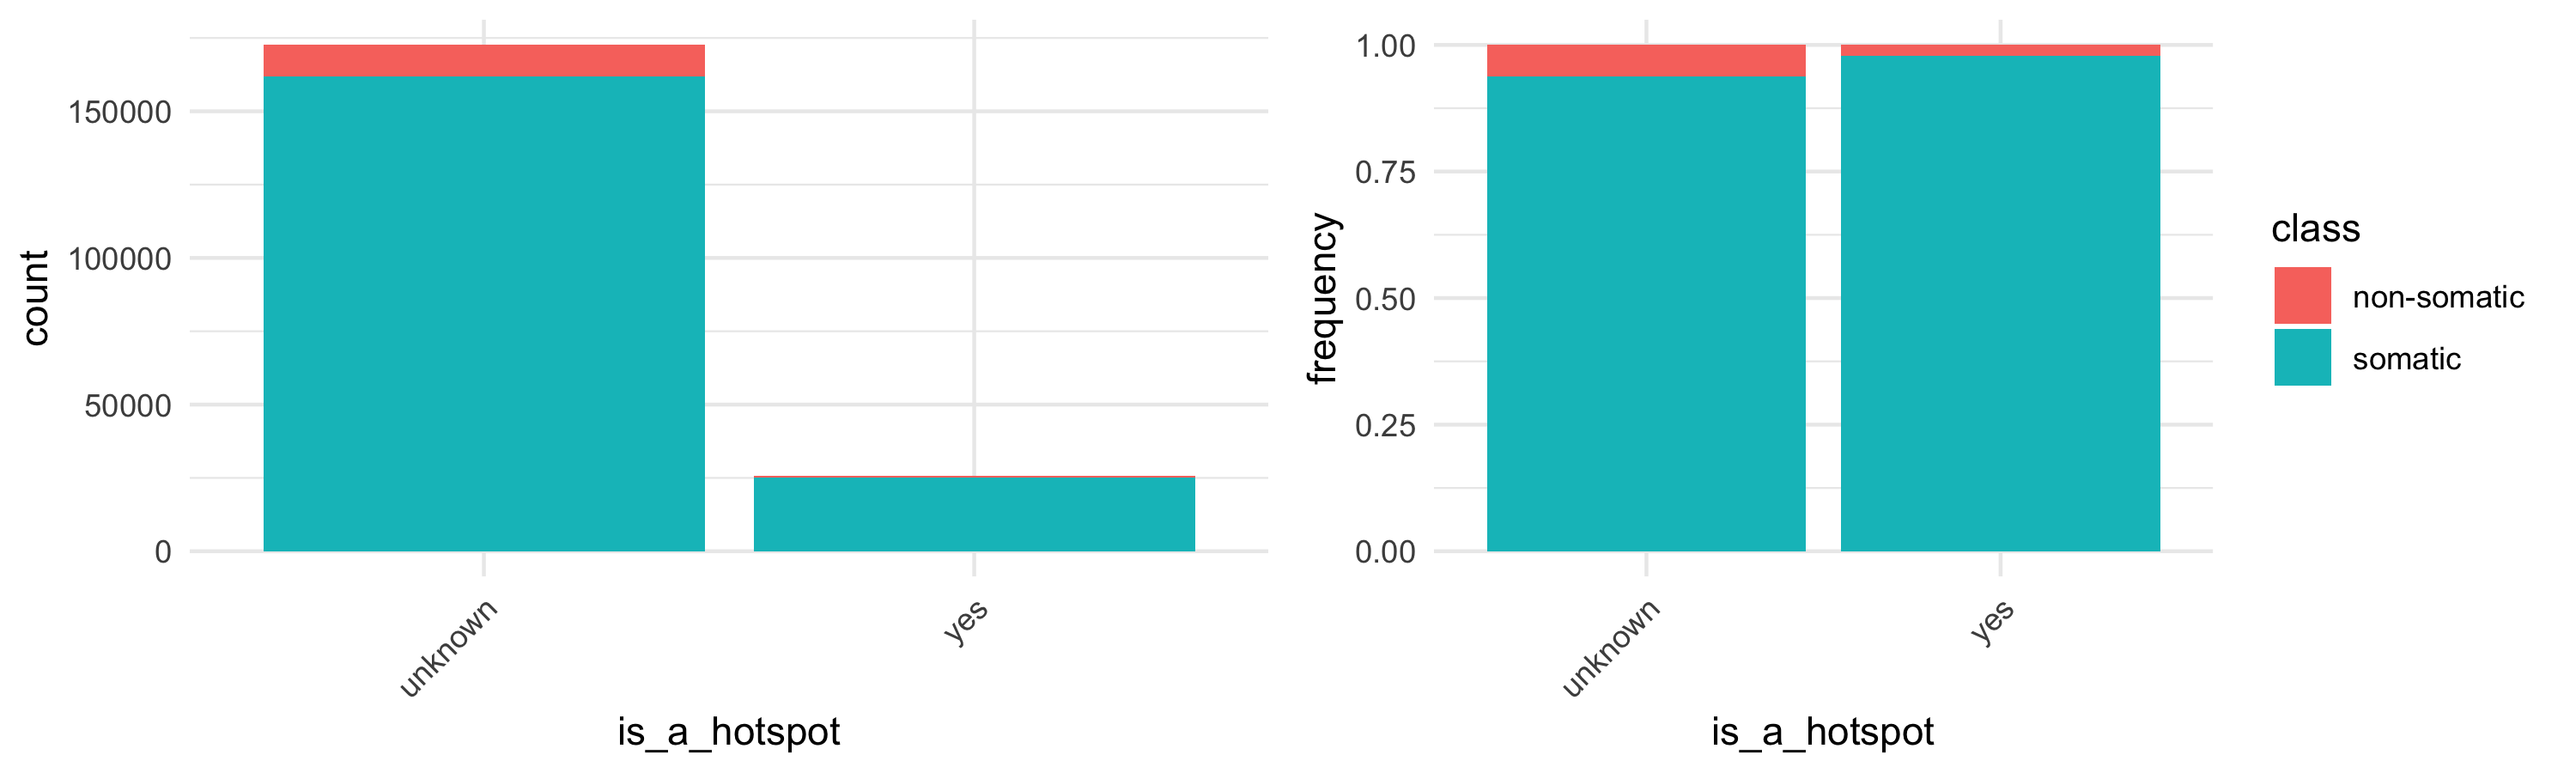

In [29]:
plot_contingency_table_as_histograms(impact[impact$class != "unknown",], "is_a_hotspot", "class")

Every variant in cancerhotspot is in OncoKB:

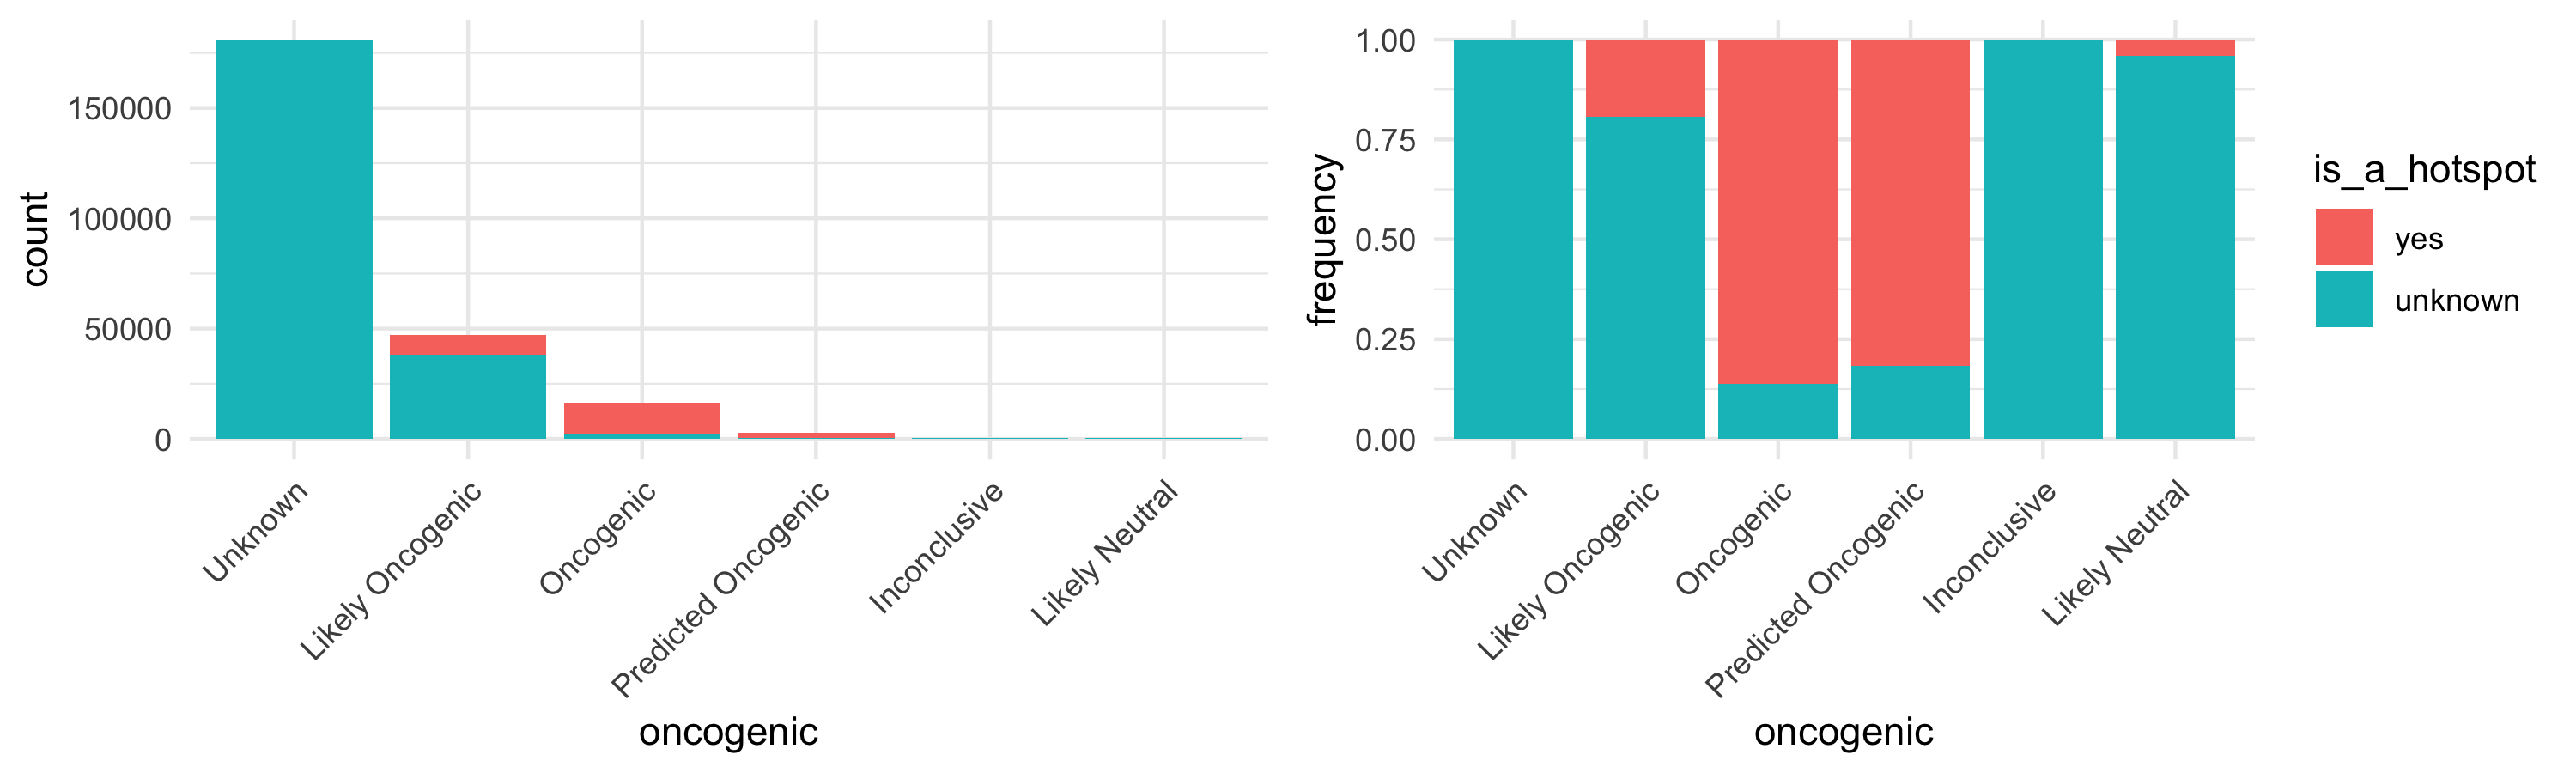

In [30]:
plot_contingency_table_as_histograms(impact, "oncogenic", "is_a_hotspot")

In [80]:
impact[impact$driver == "no" & impact$is_a_hotspot == "yes", c("Hugo_Symbol","HGVSp_Short")]

,Hugo_Symbol,HGVSp_Short
16319,PIK3CA,p.G364R
18808,EGFR,p.T363N
25986,PIK3CA,p.G364A
54216,PIK3CA,p.R115L
65226,PIK3CA,p.R115P
66285,PIK3CA,p.R115P
77974,PIK3CA,p.G364R
86196,PIK3CA,p.R115L
89624,PIK3CA,p.G364R
94150,PIK3CA,p.R115Q


## Study of `gene_type`

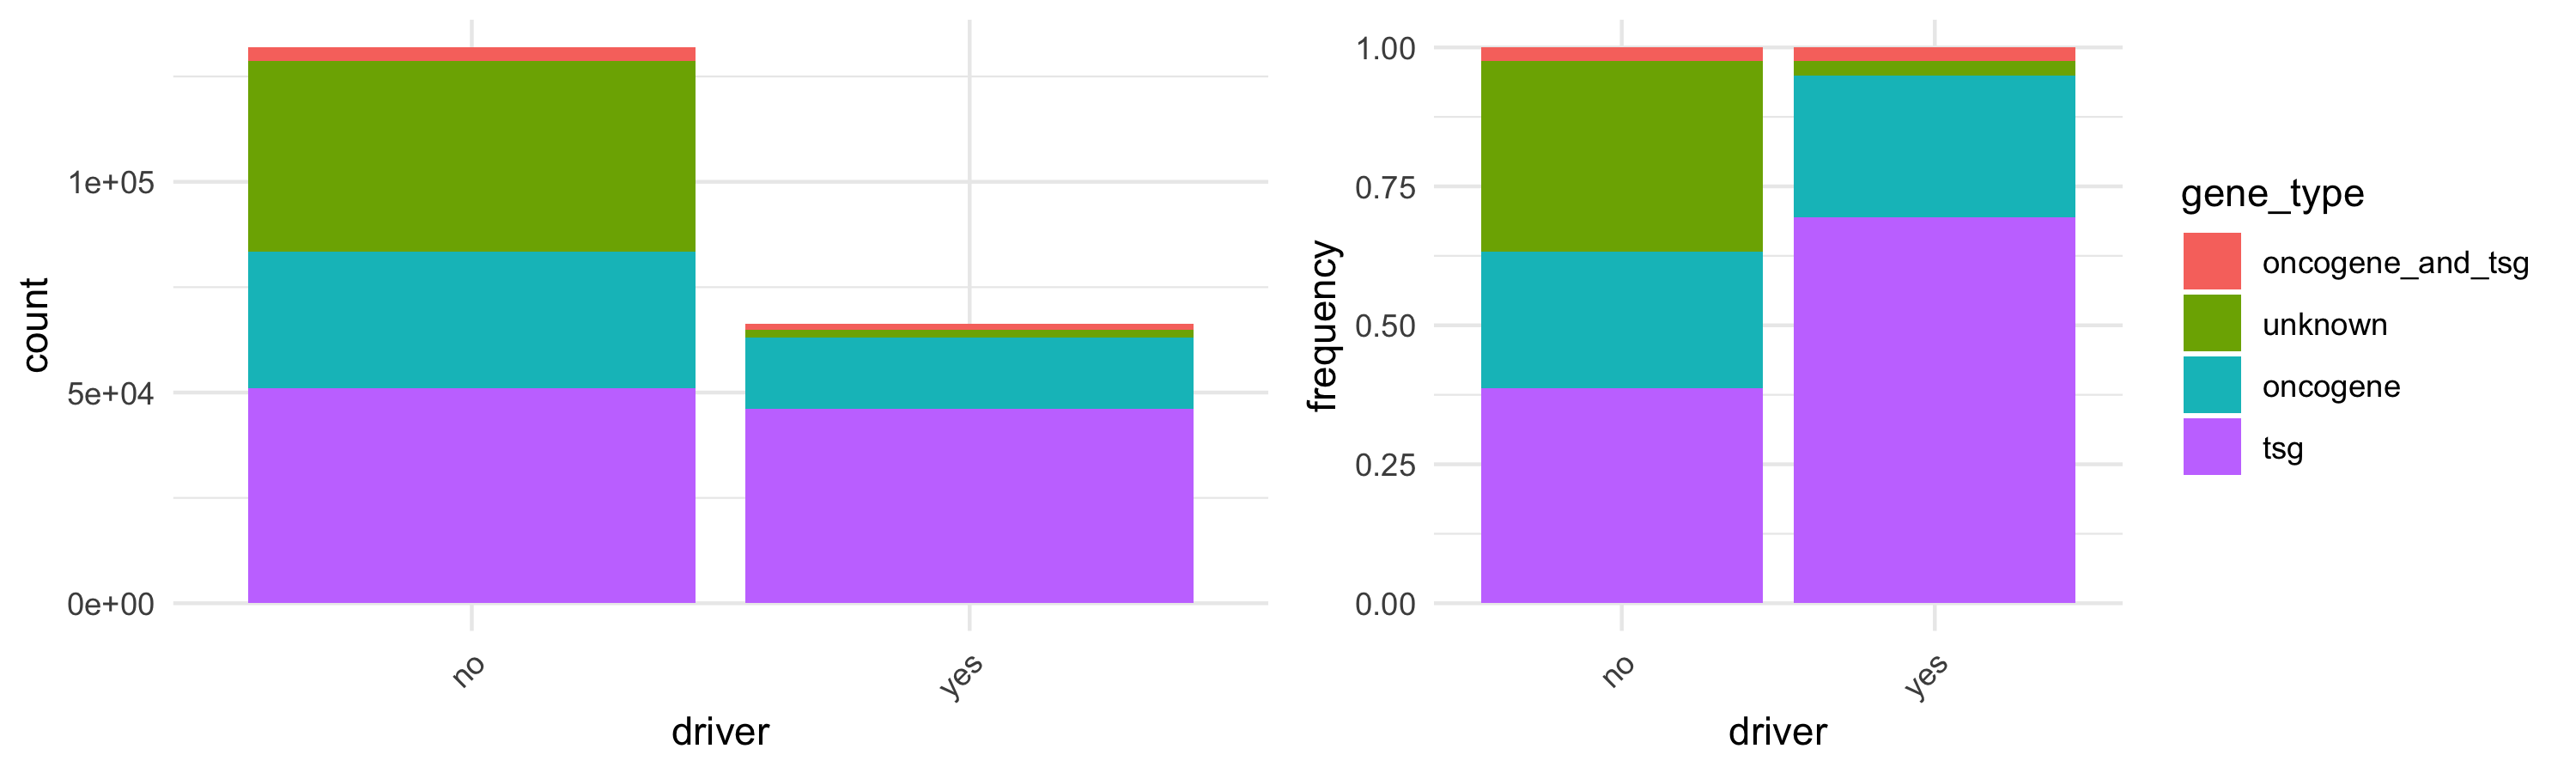

In [81]:
plot_contingency_table_as_histograms(impact, "driver", "gene_type")

Just a few variants are not in oncoKB but are truncated events in TSG genes, and a third of them comes from the gene `ZFHX3` which [doesn't show any variant](http://oncokb.org/#/gene/ZFHX3) in OncoKB:

In [82]:
truncating_mutations <- c("frameshift_deletion", "frameshift_insertion", "stopgain_SNV", "splicing")

# number of truncating event in TSG genes not being driver among the truncating event in TSG genes
trunc_tsg_but_not_drivers <- impact[impact$Consequence %in% truncating_mutations &
                                    impact$gene_type == "tsg" &
                                    impact$driver == "no",]

print_count_and_proportion(trunc_tsg_but_not_drivers, impact[impact$Consequence %in% truncating_mutations &
                                                             impact$gene_type == "tsg",])
table(trunc_tsg_but_not_drivers$Hugo_Symbol)

[1] "967 over 35284 (2.74%)"


  CYLD  ERCC2   FLCN   INHA  MUTYH  PALB2  POLD1   POLE RECQL4   SDHA   SDHC 
    47     34     77     17     32     85     84    114     63     27      7 
  SDHD   SPOP  ZFHX3 
     4     18    358 

## Annotate without oncokb-annotator

We are going to try to annotate our dataset without using oncokb-annotator but rather "by hand" using the raw OncoKB dataset dowloaded [here](http://oncokb.org/#/dataAccess) (blue button "ALL VARIANTS") on 06/08/18. We follow the methodology described in `annotate_cleaned_dataset.ipynb`.

We will only work on the coding mutations:

In [33]:
impact <- impact[impact$Consequence != "synonymous_SNV",]

### Get the raw data

In [34]:
oncokb <- read.table("../../../data/other_databases/allAnnotatedVariants.txt",
                     sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

The line 3790 have two extra `3'` coming from nowhere, we remove them (it causes the importation to fail if we don't add `fill = TRUE` to `read.table`).

In [35]:
oncokb[3790,]
(oncokb[3790,] <- oncokb[3790,] %>% mutate(Isoform         = "ENST00000263735",
                                           RefSeq          = "NM_002354.2",
                                           Entrez.Gene.ID  = 4072,
                                           Gene            = "EPCAM",
                                           Alteration      = "Deletion",
                                           Protein.Change  = "Deletion",
                                           Oncogenicity    = "Oncogenic",
                                           Mutation.Effect = "Loss-of-function"))

,Isoform,RefSeq,Entrez.Gene.ID,Gene,Alteration,Protein.Change,Oncogenicity,Mutation.Effect,PMIDs.for.Mutation.Effect,Abstracts.for.Mutation.Effect
3790,ENST00000263735,NM_002354.2,4072,EPCAM,3 Deletion 3 Deletion,Oncogenic,Loss-of-function,21145788,,


Isoform,RefSeq,Entrez.Gene.ID,Gene,Alteration,Protein.Change,Oncogenicity,Mutation.Effect,PMIDs.for.Mutation.Effect,Abstracts.for.Mutation.Effect
ENST00000263735,NM_002354.2,4072,EPCAM,Deletion,Deletion,Oncogenic,Loss-of-function,,


In [36]:
head(oncokb)

Isoform,RefSeq,Entrez.Gene.ID,Gene,Alteration,Protein.Change,Oncogenicity,Mutation.Effect,PMIDs.for.Mutation.Effect,Abstracts.for.Mutation.Effect
ENST00000353533,NM_003010.3,6416,MAP2K4,N234I,N234I,Oncogenic,Loss-of-function,"20668451, 15122334",
ENST00000353533,NM_003010.3,6416,MAP2K4,P326L,P326L,Likely Oncogenic,Loss-of-function,21896780,
ENST00000353533,NM_003010.3,6416,MAP2K4,R304*,R304*,Likely Oncogenic,Loss-of-function,21896780,
ENST00000353533,NM_003010.3,6416,MAP2K4,R228K,R228K,Oncogenic,Loss-of-function,"20668451, 15122334",
ENST00000353533,NM_003010.3,6416,MAP2K4,V321M,V321M,Likely Oncogenic,Loss-of-function,21896780,
ENST00000353533,NM_003010.3,6416,MAP2K4,G85R,G85R,Oncogenic,Loss-of-function,"20668451, 15122334",


###  Create keys to join the two dataframes and extract the features

We are going to identify each mutation with a key in both dataframes, allowing us to link each mutation from `impact` to its corresponding mutation in `oncokb`. The keys will be: 
* `Hugo_Symbol`.`HGVSp_Short` for `impact` or `Hugo_Symbol`.p.`Truncating Mutations` when the mutation is truncating (OncoKB notation)
* `Gene`.p.`Protein.Change` for `oncokb`

In [37]:
# create the oncokb `join_key`
oncokb$join_key <- paste0(oncokb$Gene, '.p.',oncokb$Protein.Change)

# create the impact `oncokb_key`
impact$oncokb_key <- paste0(impact$Hugo_Symbol, '.', impact$HGVSp_Short)

is_truncating <- which(impact$Consequence %in% c("frameshift_deletion",
                                                 "frameshift_insertion",
                                                 "stopgain_SNV",
                                                 "splicing"))
impact$oncokb_key[is_truncating] <- paste0(impact$Hugo_Symbol[is_truncating], '.p.Truncating Mutations')

In [38]:
head(oncokb$join_key)
head(impact$oncokb_key)

[1] "MAP2K4.p.N234I" "MAP2K4.p.P326L" "MAP2K4.p.R304*" "MAP2K4.p.R228K"
[5] "MAP2K4.p.V321M" "MAP2K4.p.G85R"

[1] "TP53.p.T256P"                 "PIK3R3.p.I298M"              
[3] "ATR.p.R2431M"                 "PDGFRA.p.L465M"              
[5] "FBXW7.p.Truncating Mutations" "FBXW7.p.Truncating Mutations"

**Verification 1** The feature `Oncogenicity` is unique for each `join_key`:

In [39]:
nrow(oncokb %>% group_by(join_key) %>% filter(length(unique(Oncogenicity)) > 1))
oncokb <- unique(oncokb[, c("join_key", "Oncogenicity")])
head(oncokb, 4)

[1] 0

join_key,Oncogenicity
MAP2K4.p.N234I,Oncogenic
MAP2K4.p.P326L,Likely Oncogenic
MAP2K4.p.R304*,Likely Oncogenic
MAP2K4.p.R228K,Oncogenic


**Verification 2** Some impact `oncokb_key` don't have an analoguous `join_key` in `oncokb`, some `NA` values will appear and need to be handled:

In [40]:
nrow(impact[! impact$oncokb_key %in% oncokb$join_key,])

[1] 140459

In [41]:
impact[, c("oncogenicity")] <- left_join(impact, oncokb,
                                         by = c("oncokb_key" = "join_key"))[, c("Oncogenicity")]

### Compare `oncogenicity` with `oncogenic`

In [42]:
impact$oncogenicity[is.na(impact$oncogenicity)] <- "Unknown"
table(impact$oncogenicity)


    Inconclusive   Likely Neutral Likely Oncogenic        Oncogenic 
             525              239            43000            14065 
         Unknown 
          140459 

Let's compare oncokb-annotator with our raw linking:

In [43]:
print_count_and_proportion(impact[impact$oncogenic    != "Unknown",], impact)
print_count_and_proportion(impact[impact$oncogenicity != "Unknown",], impact)

[1] "67302 over 198288 (33.94%)"

[1] "57829 over 198288 (29.16%)"

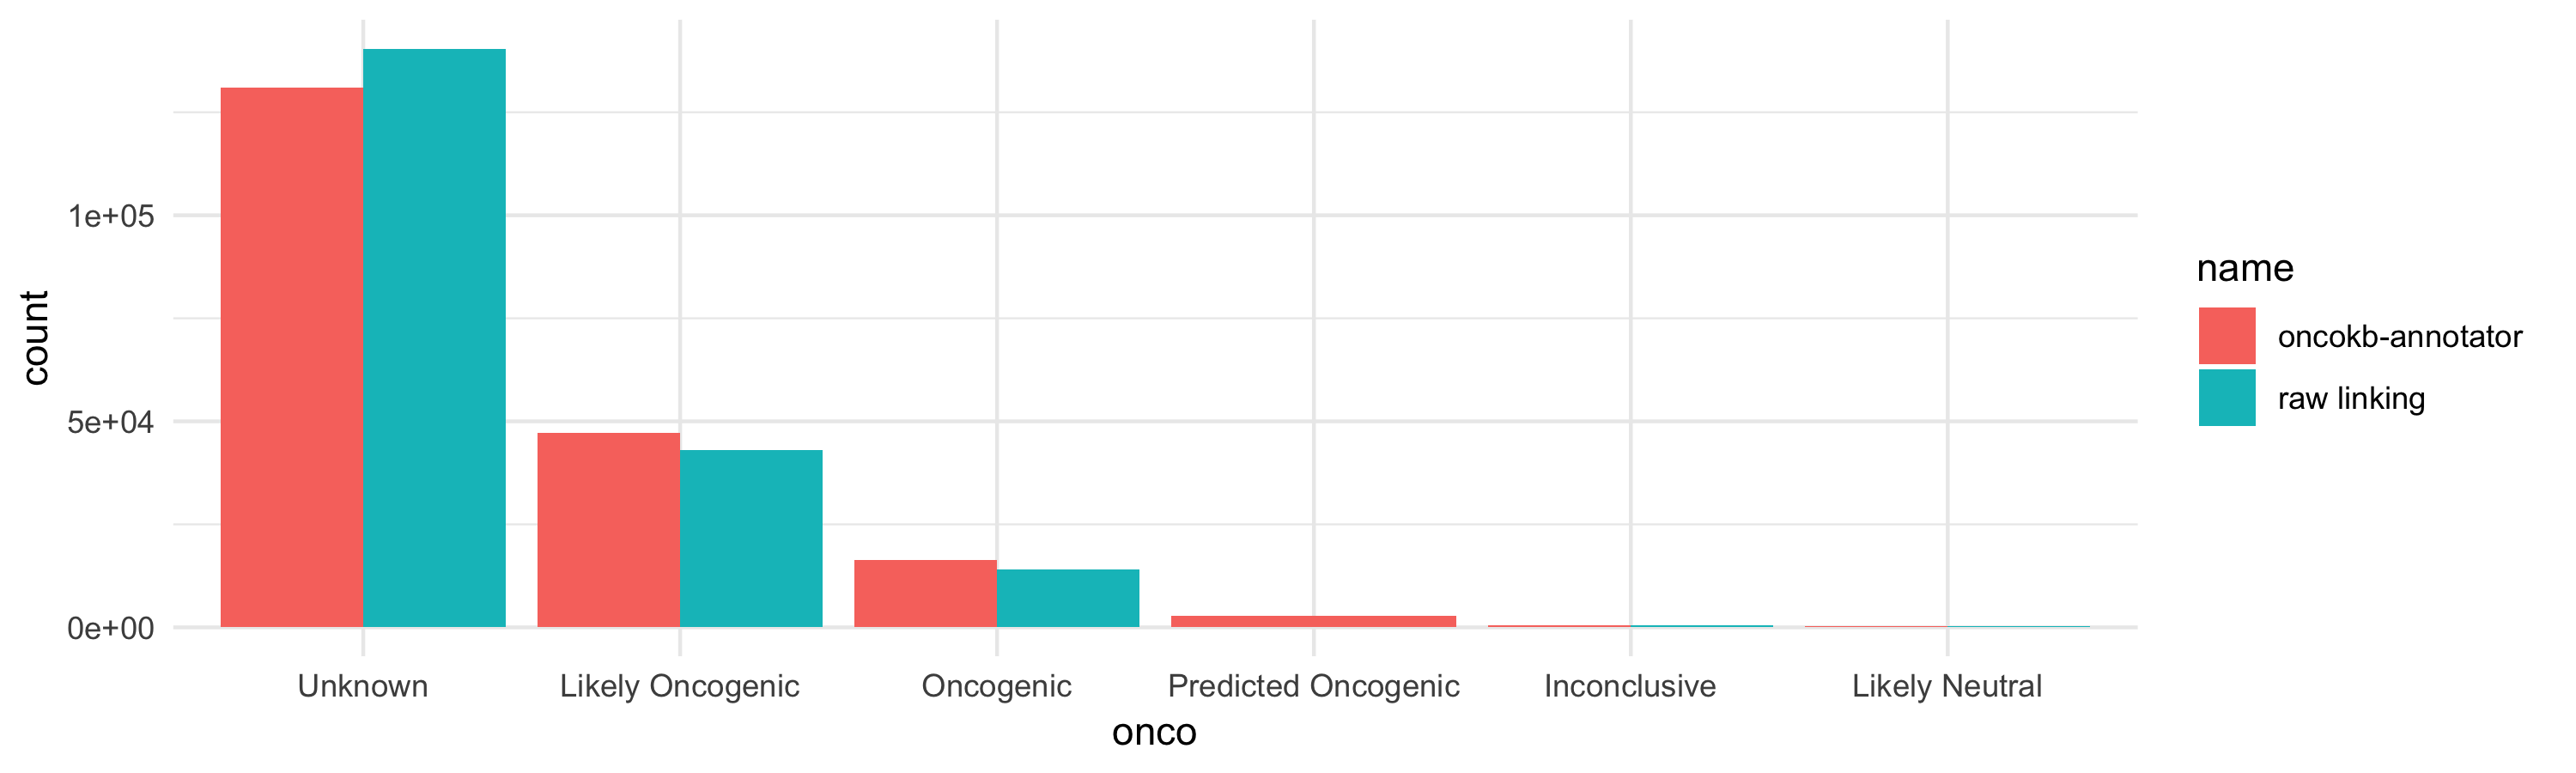

In [44]:
dd_1 <- data.frame(impact$oncogenic, "oncokb-annotator")
colnames(dd_1) <- c("onco", "name")
dd_1 <- sort_histogram(dd_1, "onco")
dd_2 <- data.frame(impact$oncogenicity, "raw linking")
colnames(dd_2) <- c("onco", "name")
dd_2 <- sort_histogram(dd_2, "onco")

ggplot(rbind(dd_1, dd_2)) + geom_bar(aes(x = onco, fill = name), position = "dodge")

## Study of the alternative amino-acid

In this section we are going to study if the alternative amino-acid changes are also considered by oncokb-annotator, for example, if `SRSF2.p.P95H` is in OncoKB, is `SRSF2.p.P95R` also in OncoKB? It will only focus on the single acid substitution. The following function returns, for a given key, the list of the alternative amino-acid keys in OncoKB:

In [45]:
amino_acid_list = c('A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
                    'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V')

get_alternative_keys_in_oncokb <- function(key) {

    # check if single acid substitution (p.T256P)
    if (grepl("\\.p\\.[A-Z][0-9]{1,4}[A-Z]$", key)) {

        alternative_amino_acid_list <- amino_acid_list[amino_acid_list != substr(key, nchar(key), nchar(key))]
        alternative_keys <- paste0(substr(key, 1, nchar(key)-1), alternative_amino_acid_list)
        in_oncokb <- which(alternative_keys %in% oncokb$join_key)
        
        if (any(alternative_keys %in% oncokb$join_key))
            return (c(key, alternative_keys[in_oncokb]))
    }
    
    return ('')
}

get_alternative_keys_in_oncokb("MAP2K4.p.S251A")
get_alternative_keys_in_oncokb("TP53.p.T256P")
get_alternative_keys_in_oncokb('FBXW7.p.Truncating Mutations')

[1] "MAP2K4.p.S251A" "MAP2K4.p.S251N"

[1] ""

[1] ""

Let's see if some of the unknown mutations would have been in OncoKB if they were resulting in an alternative amino_acid:

In [46]:
dd <- sapply(unique(impact$oncokb_key[impact$oncogenic == "Unknown"]), get_alternative_keys_in_oncokb)
dd <- unique(dd[dd != ''])
length(dd)

[1] 0

Apparently oncokb-annotator takes this into account.